**Name : Talole Prajakta Vijay**

### Problem Statment

Develop a predictive model that assesses the claim probability for car insurance policies. The objective would be to understand the factors that influence claim frequency and severity in the period of six months and enable insurance companies to better assess risk and determine appropriate premiums for policyholders.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression 
from matplotlib.colors import ListedColormap
from sklearn import metrics  ##confusion matrix and accuracy
from sklearn.metrics import classification_report

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Insurance_Data.csv')

In [3]:
data.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [5]:
data.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [6]:
data.shape

(58592, 44)

In [7]:
data.nunique()

policy_id                           58592
policy_tenure                       58592
age_of_car                             49
age_of_policyholder                    75
area_cluster                           22
population_density                     22
make                                    5
segment                                 6
model                                  11
fuel_type                               3
max_torque                              9
max_power                               9
engine_type                            11
airbags                                 3
is_esc                                  2
is_adjustable_steering                  2
is_tpms                                 2
is_parking_sensors                      2
is_parking_camera                       2
rear_brakes_type                        2
displacement                            9
cylinder                                2
transmission_type                       2
gear_box                          

In [8]:
data.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

**EDA**

Exploratory Data Analysis or EDA is used to take insights from the data. Data Scientists and Analysts try to find different patterns, relations, and anomalies in the data using some statistical graphs and other visualization techniques. Following things are part of EDA :

Get maximum insights from a data set
Uncover underlying structure
Extract important variables from the dataset
Detect outliers and anomalies(if any)
Test underlying assumptions
Determine the optimal factor settings

In [9]:
##To check whether there is any null value in the columns
data.isnull().sum()
#data.isnull().values.any()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [10]:
data.duplicated().sum()

0

In [11]:
### No any null Values ###

<AxesSubplot:>

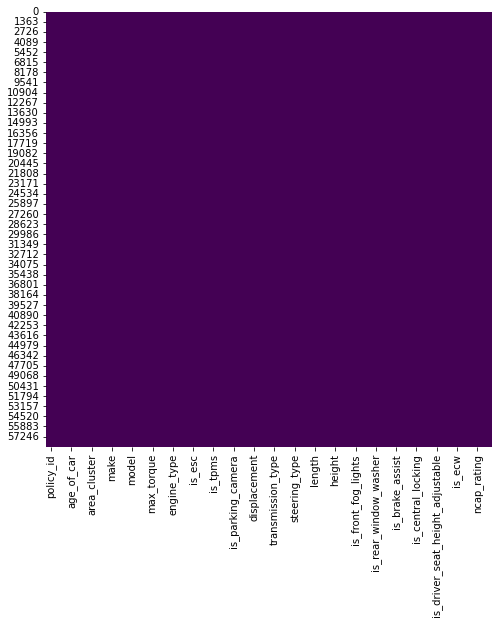

In [12]:
##We can also  check whether there is any null value in the columns using heatmap
fig=plt.figure(figsize=(8,8))
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

In [13]:
# finding the columns where all values are unique
one_unique=data.apply(pd.Series.nunique)
one_unique

policy_id                           58592
policy_tenure                       58592
age_of_car                             49
age_of_policyholder                    75
area_cluster                           22
population_density                     22
make                                    5
segment                                 6
model                                  11
fuel_type                               3
max_torque                              9
max_power                               9
engine_type                            11
airbags                                 3
is_esc                                  2
is_adjustable_steering                  2
is_tpms                                 2
is_parking_sensors                      2
is_parking_camera                       2
rear_brakes_type                        2
displacement                            9
cylinder                                2
transmission_type                       2
gear_box                          

In [14]:
Obj_lst=[];int_lst=[];float_lst=[]
for column in data.columns:
    if data[column].dtype == 'object':
        Obj_lst.append(column)
    elif data[column].dtype == 'int64' :
        int_lst.append(column)
    else:

        float_lst.append(column)

print('Columns with Object datatype:',Obj_lst)   
print('*****************************************************************************************')
print('Columns with int datatype:',int_lst)   
print('*****************************************************************************************')
print('Columns with float datatype:',float_lst)   
print('*****************************************************************************************')
        
        
        

Columns with Object datatype: ['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']
*****************************************************************************************
Columns with int datatype: ['population_density', 'make', 'airbags', 'displacement', 'cylinder', 'gear_box', 'length', 'width', 'height', 'gross_weight', 'ncap_rating', 'is_claim']
*****************************************************************************************
Columns with float datatype: ['policy_tenure', 'age_of_car', 'age_of_policy

In [15]:
for column in data.columns:
        print(str(column) + ' : ' + str(data[column].unique()))
        print(data[column].value_counts())
        print("_________________________________________________________________")

policy_id : ['ID00001' 'ID00002' 'ID00003' ... 'ID58590' 'ID58591' 'ID58592']
ID00001    1
ID39053    1
ID39055    1
ID39056    1
ID39057    1
          ..
ID19535    1
ID19536    1
ID19537    1
ID19538    1
ID58592    1
Name: policy_id, Length: 58592, dtype: int64
_________________________________________________________________
policy_tenure : [0.51587359 0.67261851 0.84111026 ... 1.16227251 1.2363069  0.12442893]
0.515874    1
1.011813    1
0.031010    1
0.272315    1
0.588006    1
           ..
1.153225    1
0.317849    1
1.128647    1
0.097815    1
0.124429    1
Name: policy_tenure, Length: 58592, dtype: int64
_________________________________________________________________
age_of_car : [0.05 0.02 0.11 0.07 0.16 0.14 0.04 0.01 0.12 0.03 0.1  0.09 0.   0.08
 0.15 0.13 0.39 0.17 0.06 0.18 0.2  0.29 0.19 0.38 0.22 0.23 0.26 0.21
 0.27 0.28 0.3  0.25 0.31 0.33 0.35 0.32 0.24 0.37 1.   0.42 0.36 0.45
 0.49 0.46 0.34 0.82 0.44 0.62 0.81]
0.01    6362
0.00    5257
0.02    5189
0.03    4

height : [1475 1515 1490 1635 1523 1530 1500 1675 1501 1825 1606]
1475    14948
1635    14018
1530    13776
1675     4173
1500     2940
1490     2373
1501     2114
1523     1598
1825     1209
1515     1080
1606      363
Name: height, dtype: int64
_________________________________________________________________
gross_weight : [1185 1335 1155 1720 1490 1410 1340 1051 1510 1660]
1185    14948
1335    14856
1720    14018
1340     4173
1410     2940
1155     2373
1051     2114
1490     1598
1510     1209
1660      363
Name: gross_weight, dtype: int64
_________________________________________________________________
is_front_fog_lights : ['No' 'Yes']
Yes    33928
No     24664
Name: is_front_fog_lights, dtype: int64
_________________________________________________________________
is_rear_window_wiper : ['No' 'Yes']
No     41634
Yes    16958
Name: is_rear_window_wiper, dtype: int64
_________________________________________________________________
is_rear_window_washer : ['No' 'Yes']
No     4

In [16]:
## Unique values in each column
for col in data.columns:
    print(col,data[col].nunique())
    print('-'*35)

policy_id 58592
-----------------------------------
policy_tenure 58592
-----------------------------------
age_of_car 49
-----------------------------------
age_of_policyholder 75
-----------------------------------
area_cluster 22
-----------------------------------
population_density 22
-----------------------------------
make 5
-----------------------------------
segment 6
-----------------------------------
model 11
-----------------------------------
fuel_type 3
-----------------------------------
max_torque 9
-----------------------------------
max_power 9
-----------------------------------
engine_type 11
-----------------------------------
airbags 3
-----------------------------------
is_esc 2
-----------------------------------
is_adjustable_steering 2
-----------------------------------
is_tpms 2
-----------------------------------
is_parking_sensors 2
-----------------------------------
is_parking_camera 2
-----------------------------------
rear_brakes_type 2
-------------

<AxesSubplot:xlabel='is_claim', ylabel='count'>

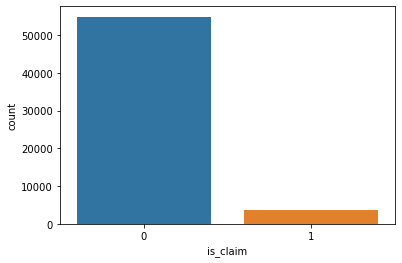

In [17]:
## plot of count of is_claim

sns.countplot(data['is_claim'])

Text(0.5, 1.0, 'Percentage of No. of claim')

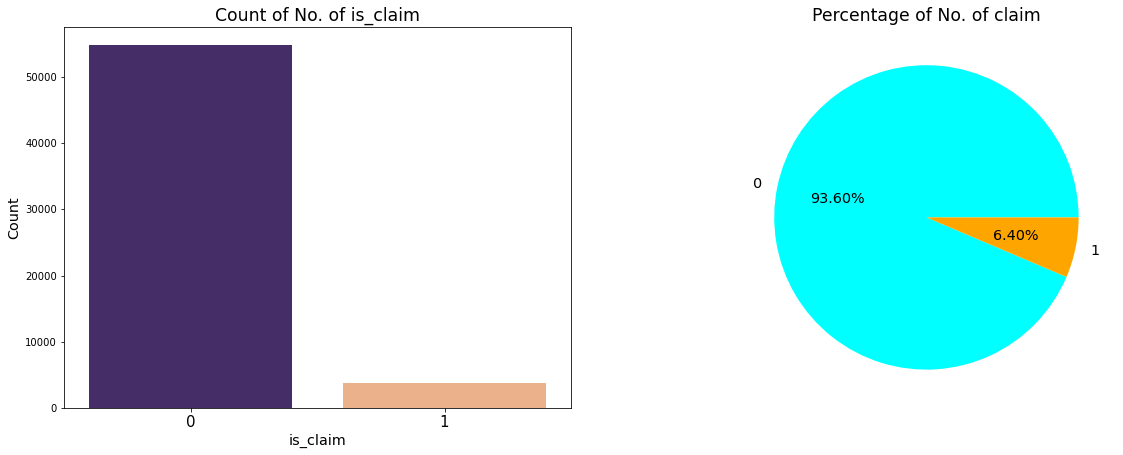

In [18]:
plt.subplots(1,2,figsize=(20,7))

plt.subplot(1,2,1)
sns.countplot(x=data['is_claim'],palette=['#432371',"#FAAE7B"])
plt.title('Count of No. of is_claim',fontdict={'fontsize':'xx-large'})
plt.xlabel('is_claim',fontdict={'fontsize':'x-large'})
plt.xticks(fontsize=15)
plt.ylabel('Count',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)
plt.pie(data['is_claim'].value_counts(),labels=data['is_claim'].value_counts().index,autopct='%0.2f%%',colors=['cyan','orange'],textprops={'fontsize':'x-large'})
plt.title('Percentage of No. of claim',fontdict={'fontsize':'xx-large'})

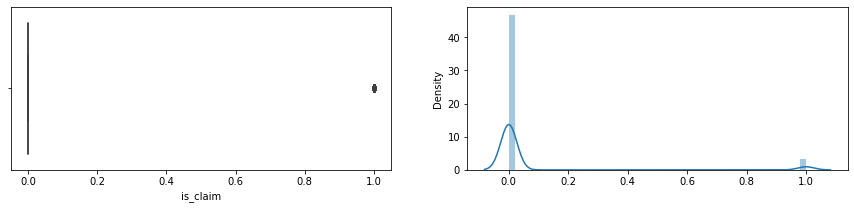

In [19]:
# Check distribution of Target Variable
# setup figure size
plt.subplots(figsize=(15,3))

# boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='is_claim', data=data);

# distplot
plt.subplot(1, 2, 2)
sns.distplot(x=data['is_claim']);

In [20]:
#data.columns

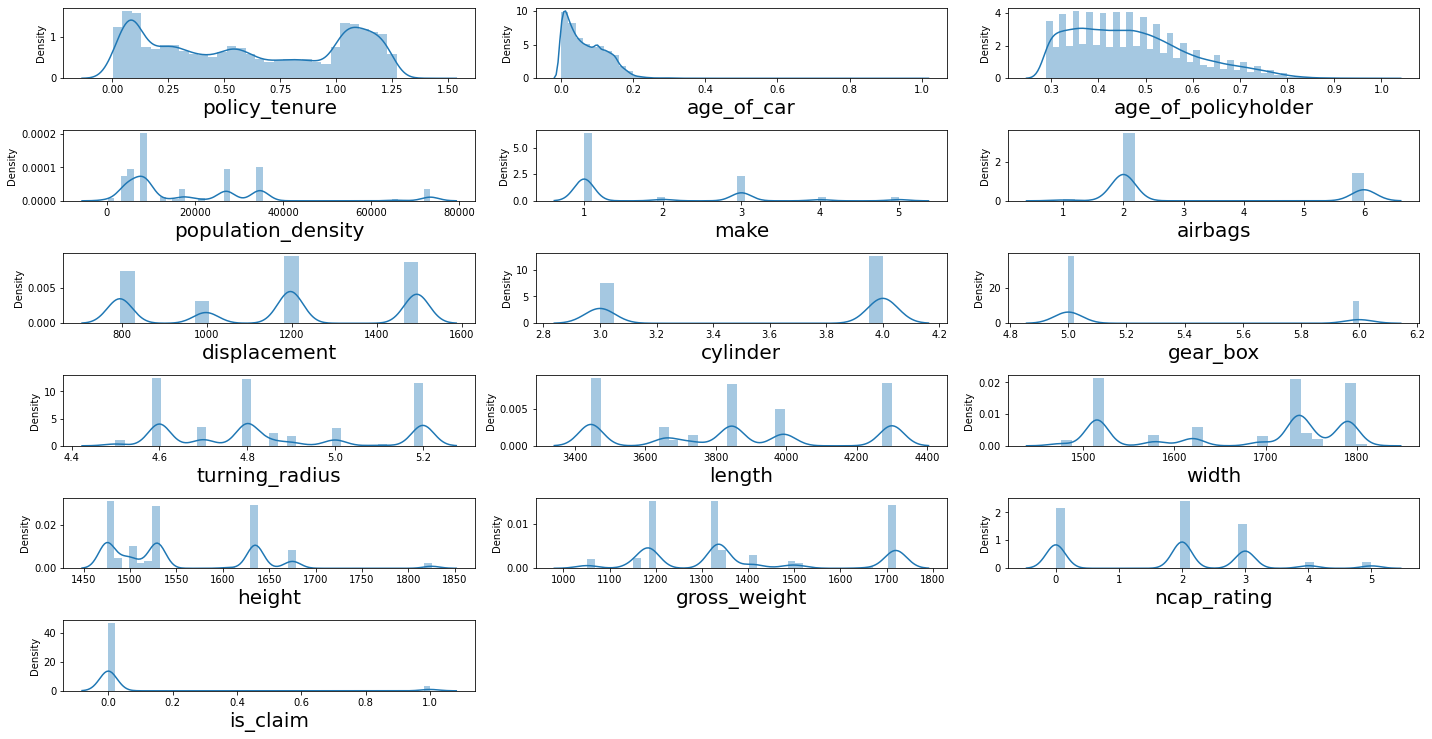

In [21]:
#lets check distribution for continuous columns
num_data = data._get_numeric_data()
plt.figure(figsize = (20,20))

plotnumber = 1
for column in num_data:
    if plotnumber <=30:
        ax = plt.subplot(12,3,plotnumber)
        sns.distplot(num_data[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

## EDA of Numerical Columns

In [22]:
####  area_cluster
data['area_cluster'].value_counts()

C8     13654
C2      7342
C5      6979
C3      6101
C14     3660
C13     3423
C10     3155
C9      2734
C7      2167
C12     1589
C1      1468
C11     1212
C19      952
C6       890
C15      771
C4       665
C17      492
C16      401
C21      379
C18      242
C22      207
C20      109
Name: area_cluster, dtype: int64

Text(0, 0.5, 'Count')

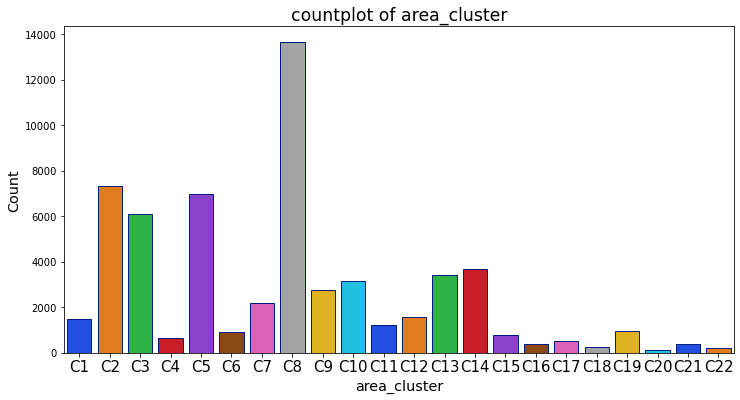

In [23]:
fig_dims = (12,6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(x=data['area_cluster'],  data = data, palette="bright", ax = ax,  
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.title('countplot of area_cluster',fontdict={'fontsize':'xx-large'})
plt.xlabel('area_cluster',fontdict={'fontsize':'x-large'})
plt.xticks(fontsize=15)
plt.ylabel('Count',fontdict={'fontsize':'x-large'})

Text(0, 0.5, 'Count')

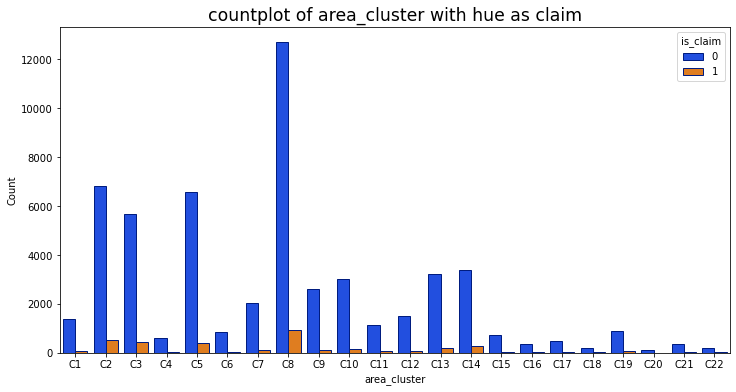

In [24]:


import matplotlib.pyplot as plt
fig_dims = (12,6)
fig, ax = plt.subplots(figsize=fig_dims)
#ax = axis
sns.countplot(x=data['area_cluster'], hue=data['is_claim'], data = data, palette="bright", ax = ax,  
              edgecolor=sns.color_palette("dark", n_colors = 1))

plt.title('countplot of area_cluster with hue as claim',fontdict={'fontsize':'xx-large'})
plt.xlabel('area_cluster')
plt.ylabel('Count')

Text(0.5, 1.0, 'cluster C22')

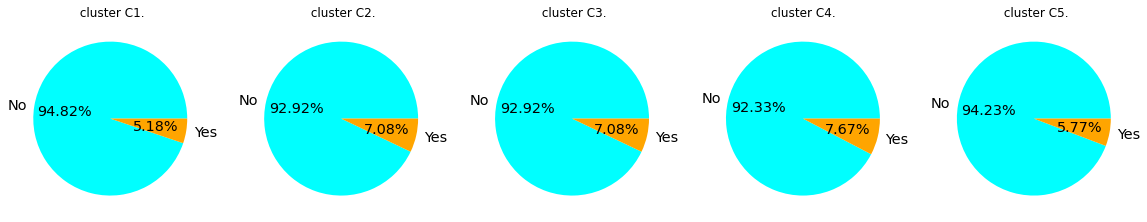

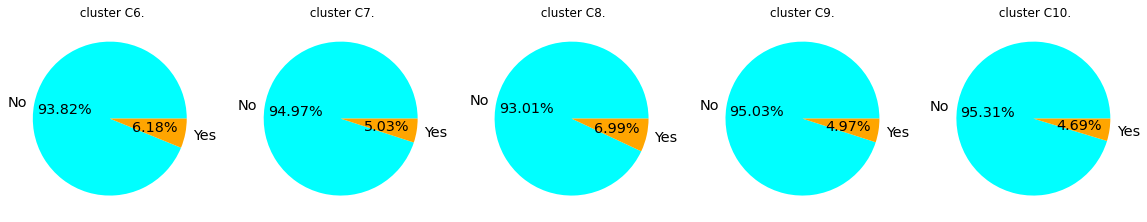

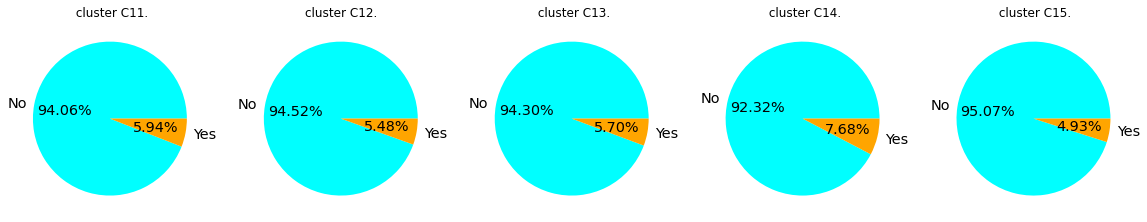

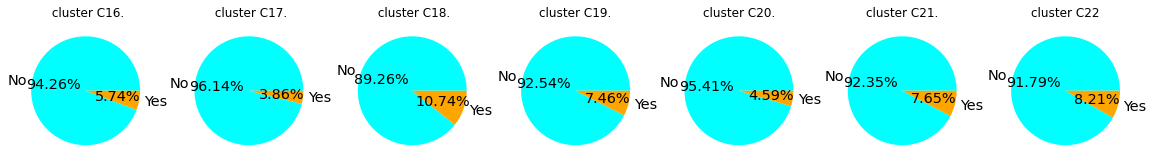

In [25]:
plt.subplots(1,5,figsize=(20,6))

plt.subplot(1,5,1)
C1=data[data['area_cluster']=='C1']
plt.pie(C1['is_claim'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title(' cluster C1.')

plt.subplot(1,5,2)
C2=data[data['area_cluster']=='C2']
plt.pie(C2['is_claim'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title(' cluster C2.')

plt.subplot(1,5,3)
C2=data[data['area_cluster']=='C2']
plt.pie(C2['is_claim'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title(' cluster C3.')

plt.subplot(1,5,4)
C4=data[data['area_cluster']=='C4']
plt.pie(C4['is_claim'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('cluster C4.')

plt.subplot(1,5,5)
C5=data[data['area_cluster']=='C5']
plt.pie(C5['is_claim'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title(' cluster C5.')


plt.subplots(1,5,figsize=(20,6))


plt.subplot(1,5,1)
C6=data[data['area_cluster']=='C6']
plt.pie(C6['is_claim'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title(' cluster C6.')

plt.subplot(1,5,2)
C7=data[data['area_cluster']=='C7']
plt.pie(C7['is_claim'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title(' cluster C7.')

plt.subplot(1,5,3)
C8=data[data['area_cluster']=='C8']
plt.pie(C8['is_claim'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title(' cluster C8.')

plt.subplot(1,5,4)
C9=data[data['area_cluster']=='C9']
plt.pie(C9['is_claim'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('cluster C9.',)

plt.subplot(1,5,5)
C10=data[data['area_cluster']=='C10']
plt.pie(C10['is_claim'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title(' cluster C10.')


plt.subplots(1,5,figsize=(20,6))

plt.subplot(1,5,1)
C11=data[data['area_cluster']=='C11']
plt.pie(C11['is_claim'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title(' cluster C11.')

plt.subplot(1,5,2)
C12=data[data['area_cluster']=='C12']
plt.pie(C12['is_claim'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('cluster C12.')

plt.subplot(1,5,3)
C13=data[data['area_cluster']=='C13']
plt.pie(C13['is_claim'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title(' cluster C13.')

plt.subplot(1,5,4)
C14=data[data['area_cluster']=='C14']
plt.pie(C14['is_claim'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title(' cluster C14.')

plt.subplot(1,5,5)
C15=data[data['area_cluster']=='C15']
plt.pie(C15['is_claim'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title(' cluster C15.')

plt.subplots(1,7,figsize=(20,6))

plt.subplot(1,7,1)
C16=data[data['area_cluster']=='C16']
plt.pie(C16['is_claim'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title(' cluster C16.')

plt.subplot(1,7,2)
C17=data[data['area_cluster']=='C17']
plt.pie(C17['is_claim'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title(' cluster C17.')

plt.subplot(1,7,3)
C18=data[data['area_cluster']=='C18']
plt.pie(C18['is_claim'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title(' cluster C18.')

plt.subplot(1,7,4)
C19=data[data['area_cluster']=='C19']
plt.pie(C19['is_claim'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('cluster C19.')

plt.subplot(1,7,5)
C20=data[data['area_cluster']=='C20']
plt.pie(C20['is_claim'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('cluster C20.')

plt.subplot(1,7,6)
C21=data[data['area_cluster']=='C21']
plt.pie(C21['is_claim'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('cluster C21.')

plt.subplot(1,7,7)
C22=data[data['area_cluster']=='C22']
plt.pie(C22['is_claim'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('cluster C22')


Text(0.5, 1.0, 'clusterwise % of claim=0')

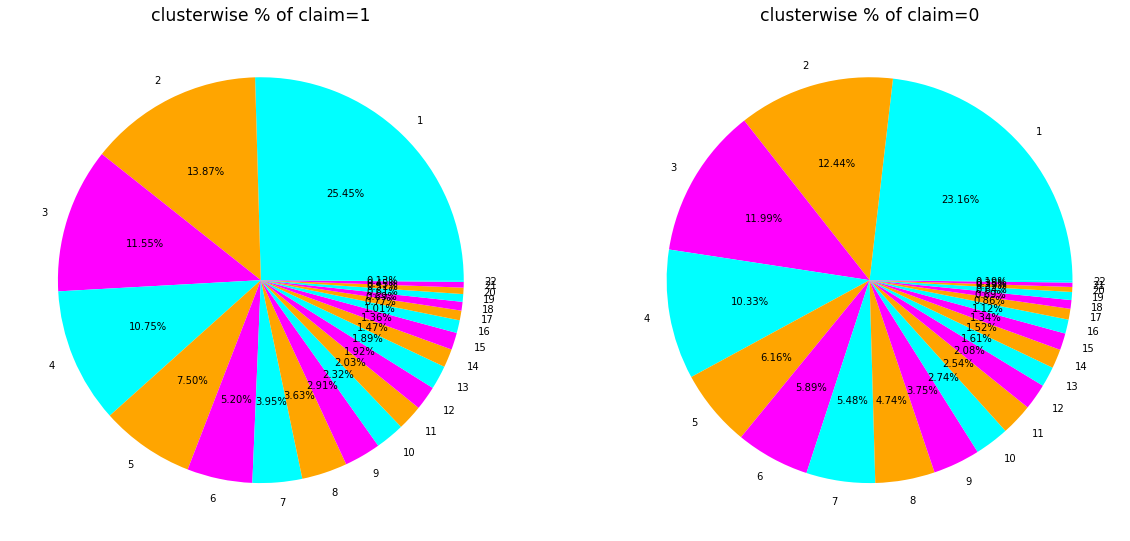

In [26]:
plt.subplots(1,2,figsize=(20,10))

plt.subplot(1,2,1)

claim_yes=data[data['is_claim']==1]
plt.pie(claim_yes['area_cluster'].value_counts(),labels=list(range(1,23)),autopct='%0.2f%%',colors=['cyan','orange','magenta'])
plt.title('clusterwise % of claim=1',fontdict={'fontsize':'xx-large'})

plt.subplot(1,2,2)
claim_no=data[data['is_claim']==0]
plt.pie(claim_no['area_cluster'].value_counts(),labels=list(range(1,23)),autopct='%0.2f%%',colors=['cyan','orange','magenta'])
plt.title('clusterwise % of claim=0',fontdict={'fontsize':'xx-large'})


In [27]:
##  population_density
print(data['population_density'].value_counts())
print(data['population_density'].nunique())

8794     13654
27003     7342
34738     6979
4076      6101
7788      3660
5410      3423
73430     3155
17804     2734
6112      2167
34791     1589
4990      1468
6108      1212
27742      952
13051      890
290        771
21622      665
65567      492
16206      401
3264       379
35036      242
16733      207
20905      109
Name: population_density, dtype: int64
22


Text(0, 0.5, 'Count')

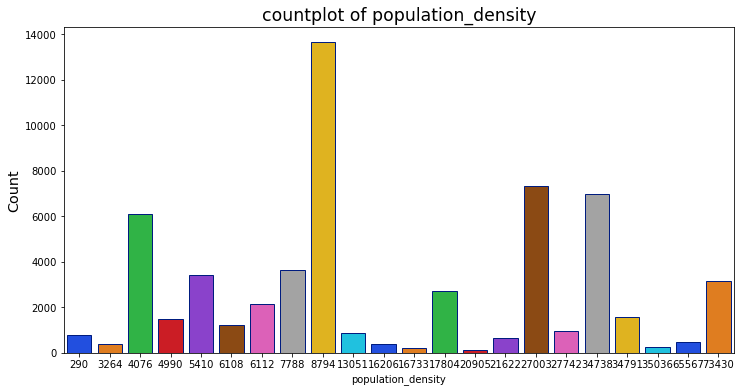

In [28]:
fig_dims = (12,6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(x=data['population_density'],  data = data, palette="bright",ax=ax  , 
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.title('countplot of population_density',fontdict={'fontsize':'xx-large'})
plt.xlabel('population_density')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})

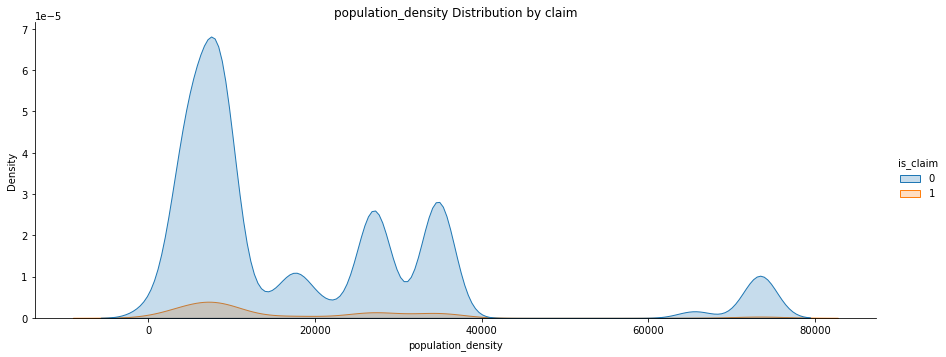

In [29]:
sns.displot(x=data['population_density'], hue=data['is_claim'], kind='kde', fill=True,aspect=2.5 )
plt.title('population_density Distribution by claim')
plt.show()

In [30]:
## Make
data['make'].value_counts()

1    38126
3    14018
2     2373
5     2114
4     1961
Name: make, dtype: int64

Text(0, 0.5, 'Count')

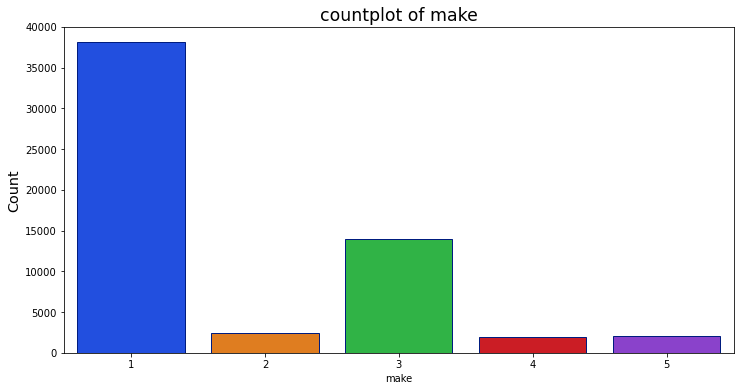

In [31]:
fig_dims = (12,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=data['make'],  data = data, palette="bright",ax=ax,
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.title('countplot of make',fontdict={'fontsize':'xx-large'})
plt.xlabel('make')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})

Text(0, 0.5, 'Count')

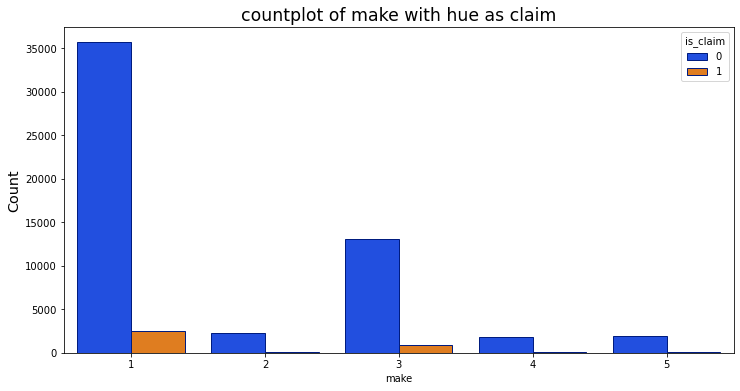

In [32]:
fig_dims = (12,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=data['make'],  data = data, palette="bright",ax=ax,
              edgecolor=sns.color_palette("dark", n_colors = 1),hue=data['is_claim'])
plt.title('countplot of make with hue as claim',fontdict={'fontsize':'xx-large'})
plt.xlabel('make')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})
##Company 1 has manufactured highest cars

Text(0.5, 1.0, 'makewise % of claim=0')

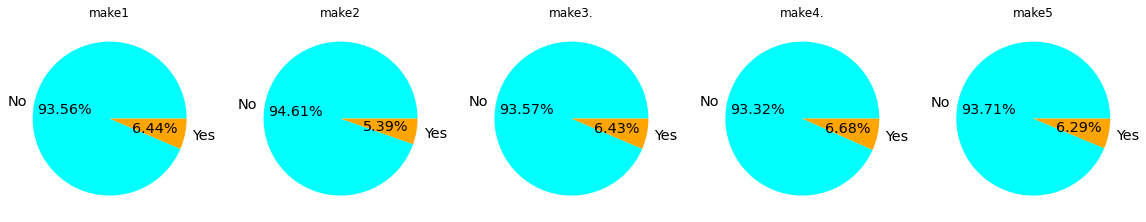

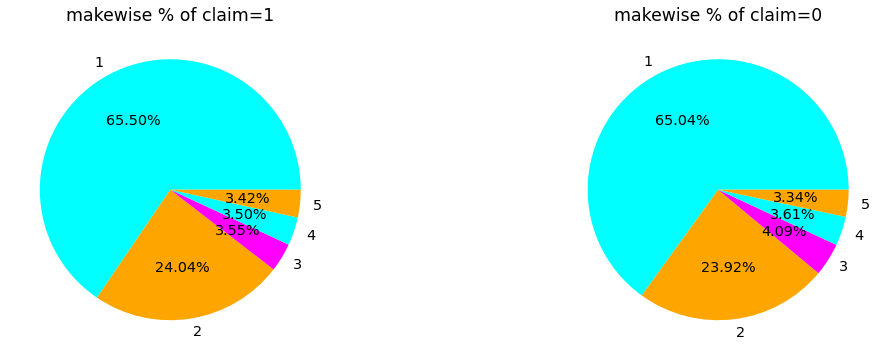

In [33]:
plt.subplots(1,5,figsize=(20,6))

plt.subplot(1,5,1)
make1=data[data['make']==1]
plt.pie(make1['is_claim'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('make1')

plt.subplot(1,5,2)
make2=data[data['make']==2]
plt.pie(make2['is_claim'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('make2')

plt.subplot(1,5,3)
make3=data[data['make']==3]
plt.pie(make3['is_claim'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('make3.')

plt.subplot(1,5,4)
make4=data[data['make']==4]
plt.pie(make4['is_claim'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('make4.')

plt.subplot(1,5,5)
make5=data[data['make']==5]
plt.pie(make5['is_claim'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('make5')

plt.subplots(1,2,figsize=(18,6))

plt.subplot(1,2,1)
claim_yes=data[data['is_claim']==1]
plt.pie(claim_yes['make'].value_counts(),labels=[1,2,3,4,5],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta'])
plt.title('makewise % of claim=1',fontdict={'fontsize':'xx-large'})

plt.subplot(1,2,2)
claim_no=data[data['is_claim']==0]
plt.pie(claim_no['make'].value_counts(),labels=[1,2,3,4,5],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta'])
plt.title('makewise % of claim=0',fontdict={'fontsize':'xx-large'})



In [34]:
### model 
print(data['model'].value_counts())
print(data['model'].nunique())

M1     14948
M4     14018
M6     13776
M8      4173
M7      2940
M3      2373
M9      2114
M5      1598
M10     1209
M2      1080
M11      363
Name: model, dtype: int64
11


Text(0, 0.5, 'Count')

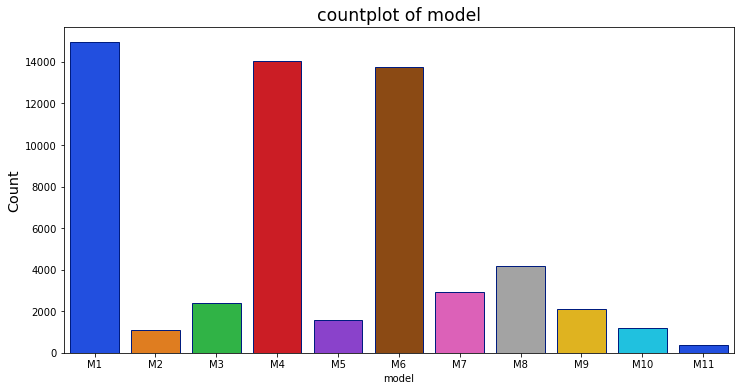

In [35]:
fig_dims = (12,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=data['model'],  data = data, palette="bright",ax=ax,
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.title('countplot of model',fontdict={'fontsize':'xx-large'})
plt.xlabel('model')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})

Text(0, 0.5, 'Count')

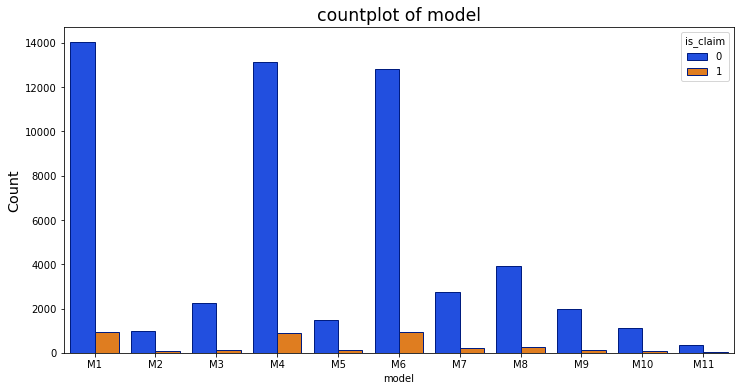

In [36]:
fig_dims = (12,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=data['model'],  data = data, palette="bright",ax=ax,
              edgecolor=sns.color_palette("dark", n_colors = 1),hue=data['is_claim'])
plt.title('countplot of model',fontdict={'fontsize':'xx-large'})
plt.xlabel('model')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})

In [37]:

## fuel_type
print(data['fuel_type'].value_counts())
print(data['fuel_type'].nunique())

Petrol    20532
CNG       20330
Diesel    17730
Name: fuel_type, dtype: int64
3


Text(0, 0.5, 'Count')

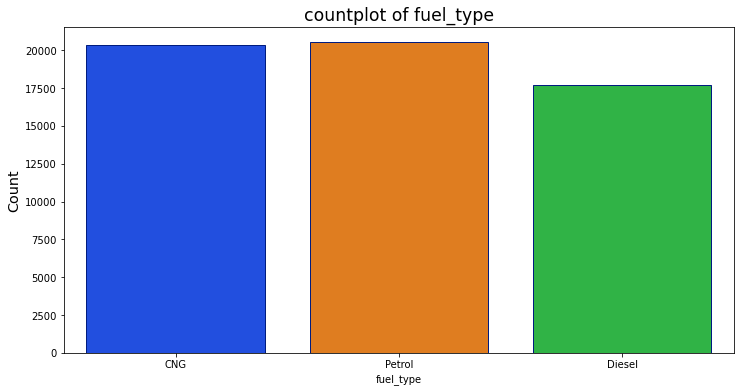

In [38]:
fig_dims = (12,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=data['fuel_type'],  data = data, palette="bright",ax=ax,
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.title('countplot of fuel_type',fontdict={'fontsize':'xx-large'})
plt.xlabel('fuel_type')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})

Text(0, 0.5, 'Count')

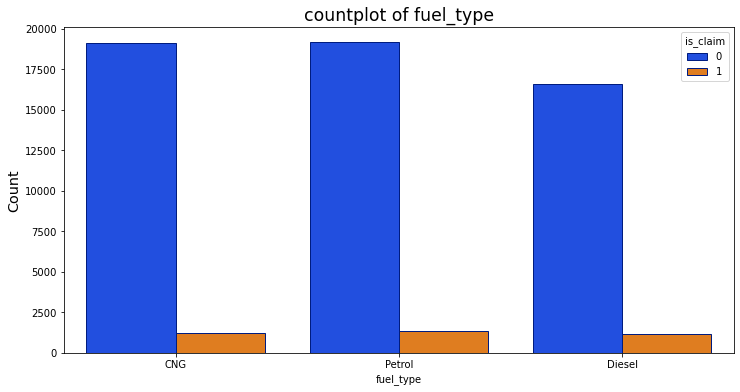

In [39]:
fig_dims = (12,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=data['fuel_type'],  data = data, palette="bright",ax=ax,
              edgecolor=sns.color_palette("dark", n_colors = 1),hue=data['is_claim'])
plt.title('countplot of fuel_type',fontdict={'fontsize':'xx-large'})
plt.xlabel('fuel_type')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})

Text(0.5, 1.0, 'makewise % of claim=0')

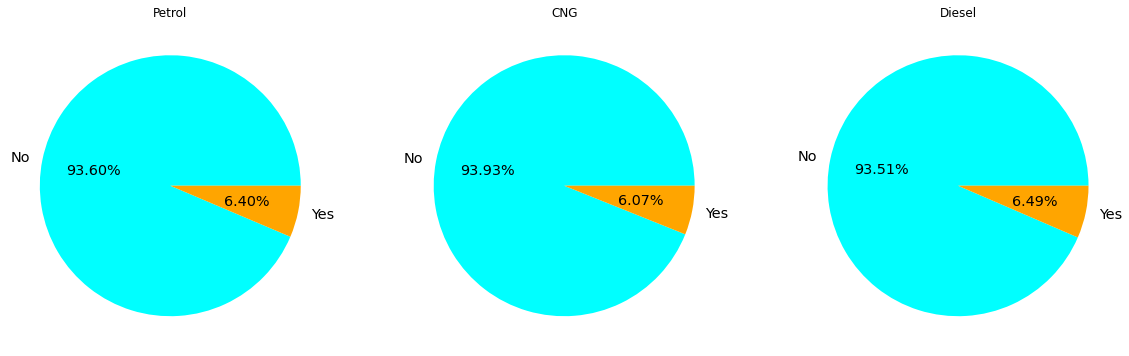

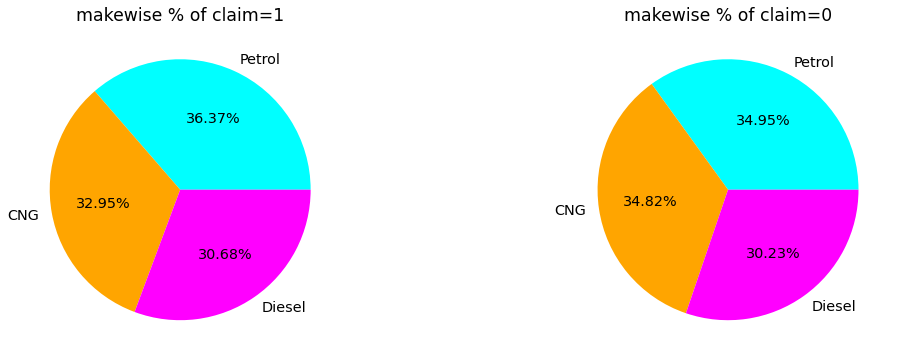

In [40]:
plt.subplots(1,3,figsize=(20,6))

plt.subplot(1,3,1)
fuel_type1=data[data['fuel_type']=='Petrol']
plt.pie(data['is_claim'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('Petrol')

plt.subplot(1,3,2)
fuel_type2=data[data['fuel_type']=='CNG']
plt.pie(fuel_type2['is_claim'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('CNG')

plt.subplot(1,3,3)
fuel_type3=data[data['fuel_type']=='Diesel']
plt.pie(fuel_type3['is_claim'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('Diesel')

plt.subplots(1,2,figsize=(18,6))

plt.subplot(1,2,1)
claim_yes=data[data['is_claim']==1]
plt.pie(claim_yes['fuel_type'].value_counts(),labels=['Petrol','CNG','Diesel'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta'])
plt.title('makewise % of claim=1',fontdict={'fontsize':'xx-large'})

plt.subplot(1,2,2)
claim_no=data[data['is_claim']==0]
plt.pie(claim_no['fuel_type'].value_counts(),labels=['Petrol','CNG','Diesel'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta'])
plt.title('makewise % of claim=0',fontdict={'fontsize':'xx-large'})


In [41]:
## Column : Segment
print(data['segment'].value_counts())
print(data['segment'].nunique())

B2         18314
A          17321
C2         14018
B1          4173
C1          3557
Utility     1209
Name: segment, dtype: int64
6


B2         18314
A          17321
C2         14018
B1          4173
C1          3557
Utility     1209
Name: segment, dtype: int64
6


Text(0, 0.5, 'Count')

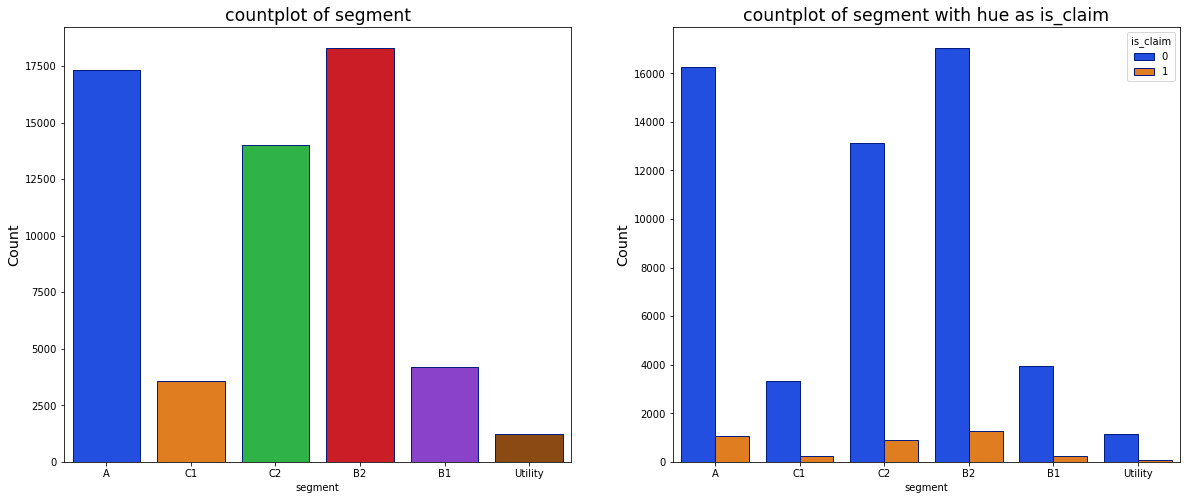

In [42]:
print(data['segment'].value_counts())
print(data['segment'].nunique())
plt.subplots(1,2,figsize=(20,8))

plt.subplot(1,2,1)

sns.countplot(x=data['segment'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.title('countplot of segment',fontdict={'fontsize':'xx-large'})
plt.xlabel('segment')
plt.ylabel('Count',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)

sns.countplot(x=data['segment'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1),hue=data['is_claim'])
plt.title('countplot of segment with hue as is_claim',fontdict={'fontsize':'xx-large'})
plt.xlabel('segment')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})


In [43]:
# max_torque
print(data['max_torque'].value_counts())
print(data['max_torque'].nunique())


113Nm@4400rpm     17796
60Nm@3500rpm      14948
250Nm@2750rpm     14018
82.1Nm@3400rpm     4173
91Nm@4250rpm       2373
200Nm@1750rpm      2114
200Nm@3000rpm      1598
85Nm@3000rpm       1209
170Nm@4000rpm       363
Name: max_torque, dtype: int64
9


Text(0, 0.5, 'Count')

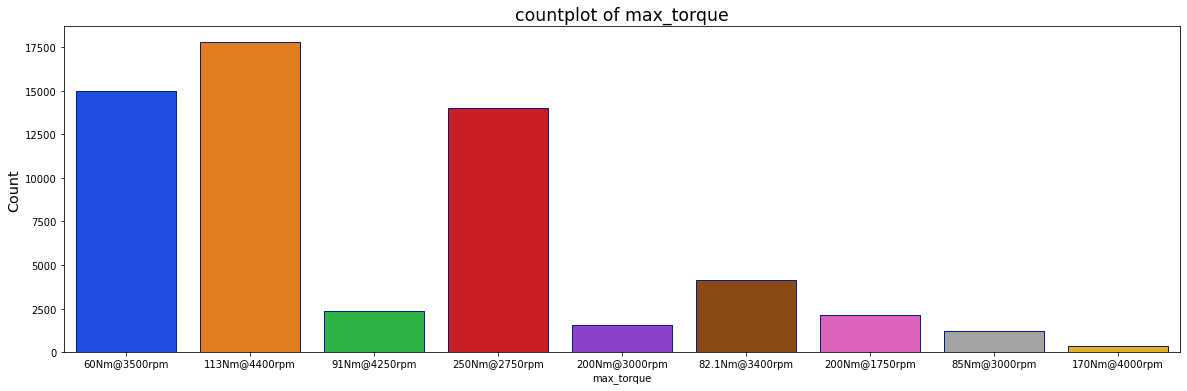

In [44]:
fig_dims = (20,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=data['max_torque'],  data = data, palette="bright",ax=ax,
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.title('countplot of max_torque',fontdict={'fontsize':'xx-large'})
plt.xlabel('max_torque')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})

Text(0, 0.5, 'Count')

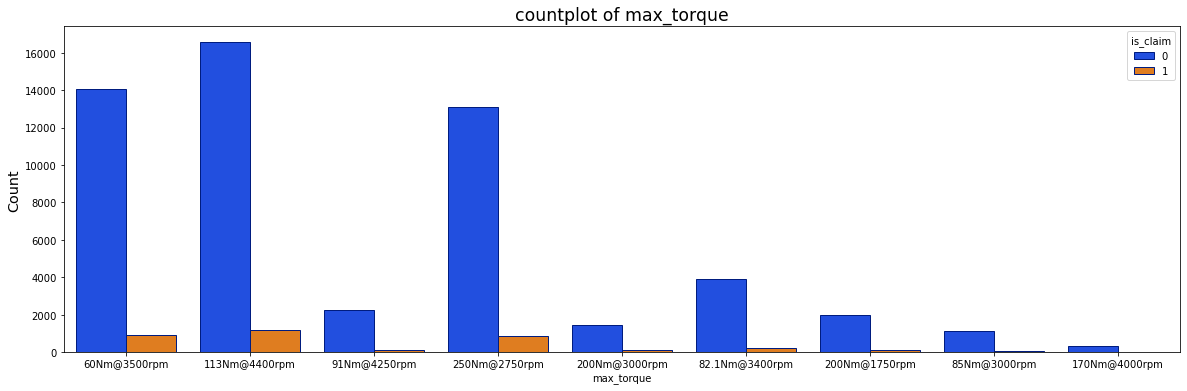

In [45]:
fig_dims = (20,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=data['max_torque'],  data = data, palette="bright",ax=ax,
              edgecolor=sns.color_palette("dark", n_colors = 1),hue=data['is_claim'])
plt.title('countplot of max_torque',fontdict={'fontsize':'xx-large'})
plt.xlabel('max_torque')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})

88.50bhp@6000rpm     17796
40.36bhp@6000rpm     14948
113.45bhp@4000rpm    14018
55.92bhp@5300rpm      4173
67.06bhp@5500rpm      2373
97.89bhp@3600rpm      2114
88.77bhp@4000rpm      1598
61.68bhp@6000rpm      1209
118.36bhp@5500rpm      363
Name: max_power, dtype: int64
9


Text(0, 0.5, 'Count')

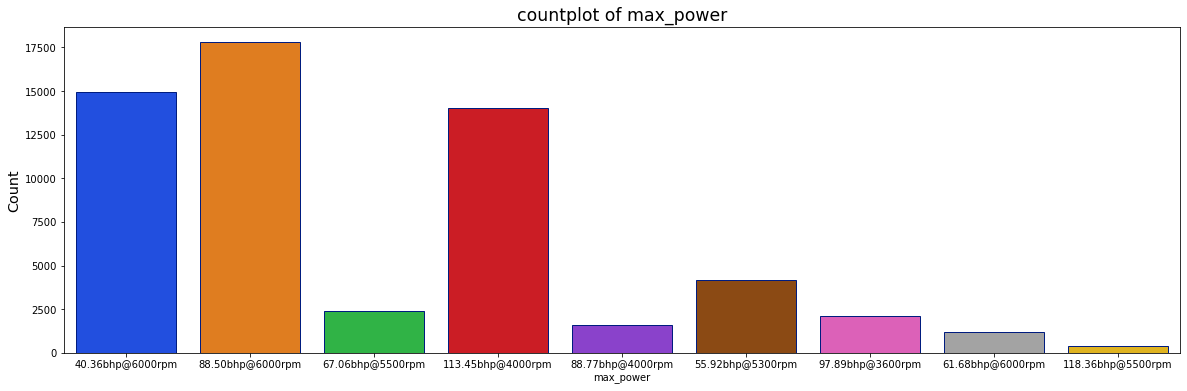

In [46]:
## Column : max_power
print(data['max_power'].value_counts())
print(data['max_power'].nunique())
fig_dims = (20,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=data['max_power'],  data = data, palette="bright",ax=ax,
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.title('countplot of max_power',fontdict={'fontsize':'xx-large'})
plt.xlabel('max_power')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})

Text(0, 0.5, 'Count')

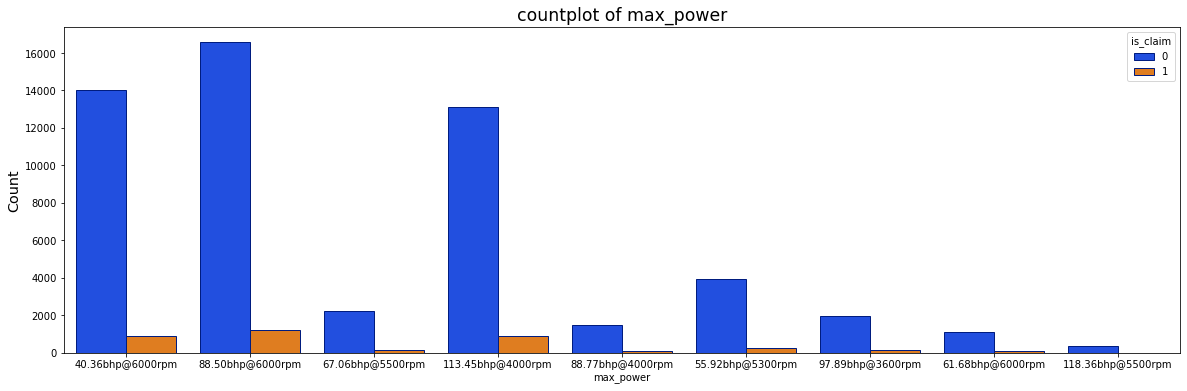

In [47]:


fig_dims = (20,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=data['max_power'],  data = data, palette="bright",ax=ax,
              edgecolor=sns.color_palette("dark", n_colors = 1),hue=data['is_claim'])
plt.title('countplot of max_power',fontdict={'fontsize':'xx-large'})
plt.xlabel('max_power')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})


F8D Petrol Engine            14948
1.5 L U2 CRDi                14018
K Series Dual jet            13776
K10C                          4173
1.2 L K Series Engine         2940
1.0 SCe                       2373
i-DTEC                        2114
1.5 Turbocharged Revotorq     1598
G12B                          1209
1.2 L K12N Dualjet            1080
1.5 Turbocharged Revotron      363
Name: engine_type, dtype: int64
11


Text(0, 0.5, 'Count')

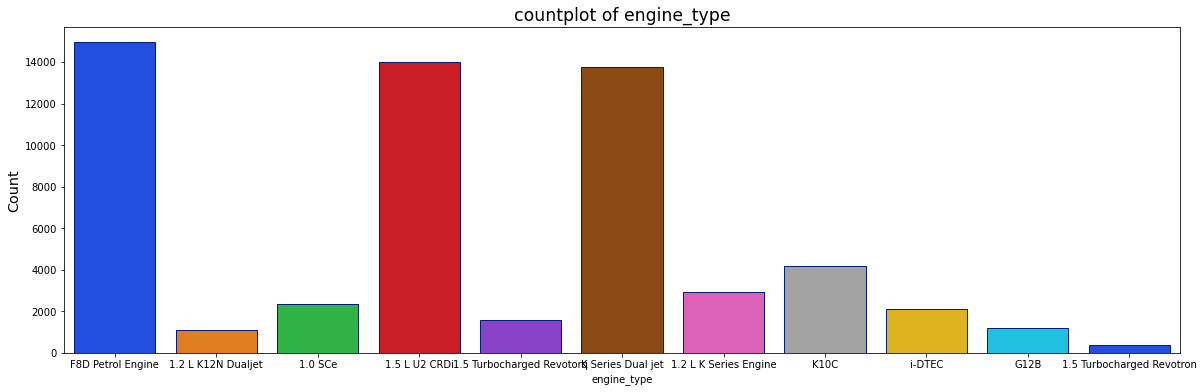

In [48]:
## engine_type

print(data['engine_type'].value_counts())
print(data['engine_type'].nunique())
fig_dims = (20,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=data['engine_type'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.title('countplot of engine_type',fontdict={'fontsize':'xx-large'})
plt.xlabel('engine_type')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})

Text(0, 0.5, 'Count')

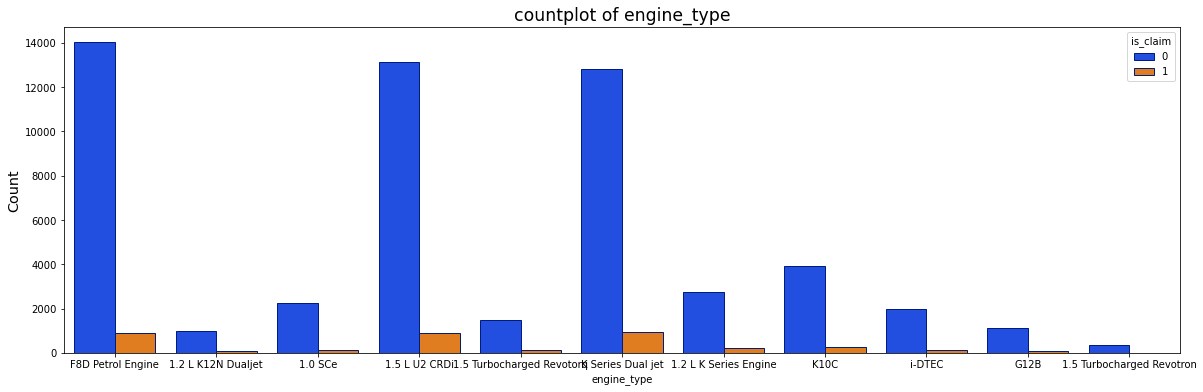

In [49]:

fig_dims = (20,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=data['engine_type'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1),hue=data['is_claim'])
plt.title('countplot of engine_type',fontdict={'fontsize':'xx-large'})
plt.xlabel('engine_type')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})

2    40425
6    16958
1     1209
Name: airbags, dtype: int64
3


Text(0, 0.5, 'Count')

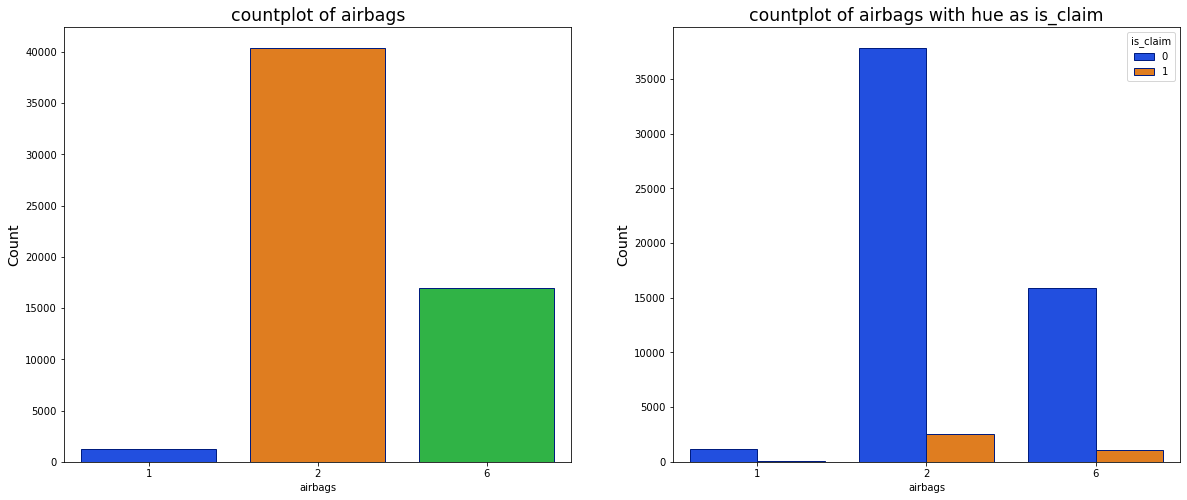

In [50]:
## Column : airbags
plt.subplots(1,2,figsize=(20,8))

plt.subplot(1,2,1)
print(data['airbags'].value_counts())
print(data['airbags'].nunique())


sns.countplot(x=data['airbags'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.title('countplot of airbags',fontdict={'fontsize':'xx-large'})
plt.xlabel('airbags')
plt.ylabel('Count',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)

sns.countplot(x=data['airbags'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1),hue=data['is_claim'])
plt.title('countplot of airbags with hue as is_claim',fontdict={'fontsize':'xx-large'})
plt.xlabel('airbags')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})


No     40191
Yes    18401
Name: is_esc, dtype: int64
2


Text(0, 0.5, 'Count')

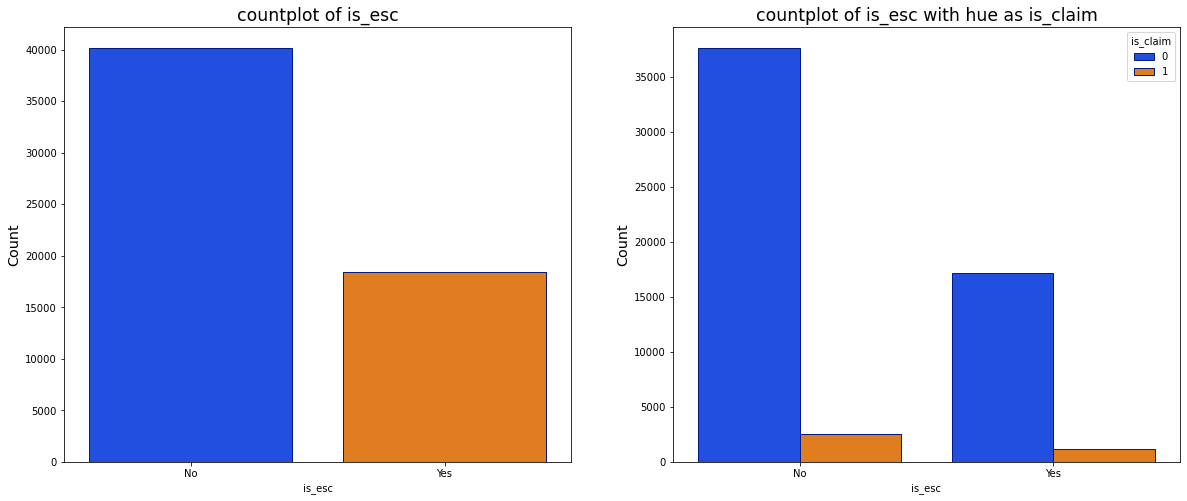

In [51]:
## Column : is_esc
print(data['is_esc'].value_counts())
print(data['is_esc'].nunique())
plt.subplots(1,2,figsize=(20,8))

plt.subplot(1,2,1)

sns.countplot(x=data['is_esc'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.title('countplot of is_esc',fontdict={'fontsize':'xx-large'})
plt.xlabel('is_esc')
plt.ylabel('Count',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)

sns.countplot(x=data['is_esc'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1),hue=data['is_claim'])
plt.title('countplot of is_esc with hue as is_claim',fontdict={'fontsize':'xx-large'})
plt.xlabel('is_esc')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})

Yes    35526
No     23066
Name: is_adjustable_steering, dtype: int64
2


Text(0, 0.5, 'Count')

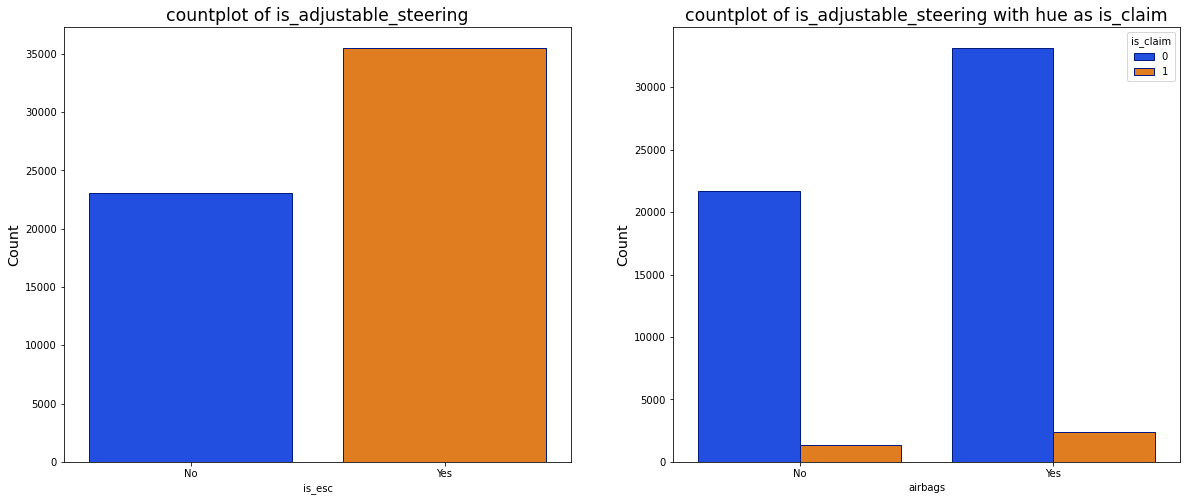

In [52]:
## Column : is_adjustable_steering
print(data['is_adjustable_steering'].value_counts())
print(data['is_adjustable_steering'].nunique())
plt.subplots(1,2,figsize=(20,8))

plt.subplot(1,2,1)

sns.countplot(x=data['is_adjustable_steering'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.title('countplot of is_adjustable_steering',fontdict={'fontsize':'xx-large'})
plt.xlabel('is_esc')
plt.ylabel('Count',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)

sns.countplot(x=data['is_adjustable_steering'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1),hue=data['is_claim'])
plt.title('countplot of is_adjustable_steering with hue as is_claim',fontdict={'fontsize':'xx-large'})
plt.xlabel('airbags')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})

No     44574
Yes    14018
Name: is_tpms, dtype: int64
2


Text(0, 0.5, 'Count')

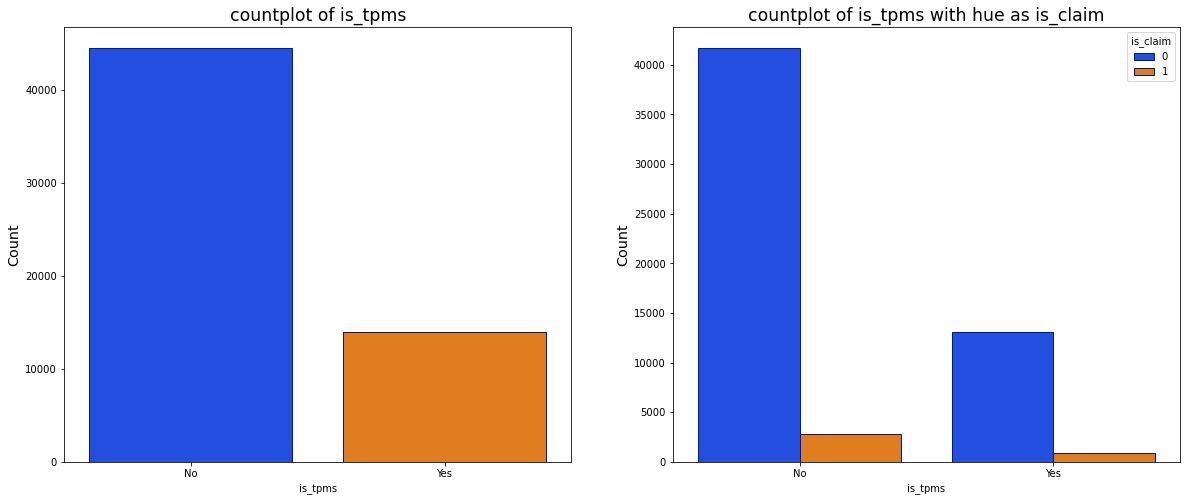

In [53]:
## Column : is_tpms
print(data['is_tpms'].value_counts())
print(data['is_tpms'].nunique())
plt.subplots(1,2,figsize=(20,8))

plt.subplot(1,2,1)

sns.countplot(x=data['is_tpms'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.title('countplot of is_tpms',fontdict={'fontsize':'xx-large'})
plt.xlabel('is_tpms')
plt.ylabel('Count',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)

sns.countplot(x=data['is_tpms'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1),hue=data['is_claim'])
plt.title('countplot of is_tpms with hue as is_claim',fontdict={'fontsize':'xx-large'})
plt.xlabel('is_tpms')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})

Yes    56219
No      2373
Name: is_parking_sensors, dtype: int64
2


Text(0, 0.5, 'Count')

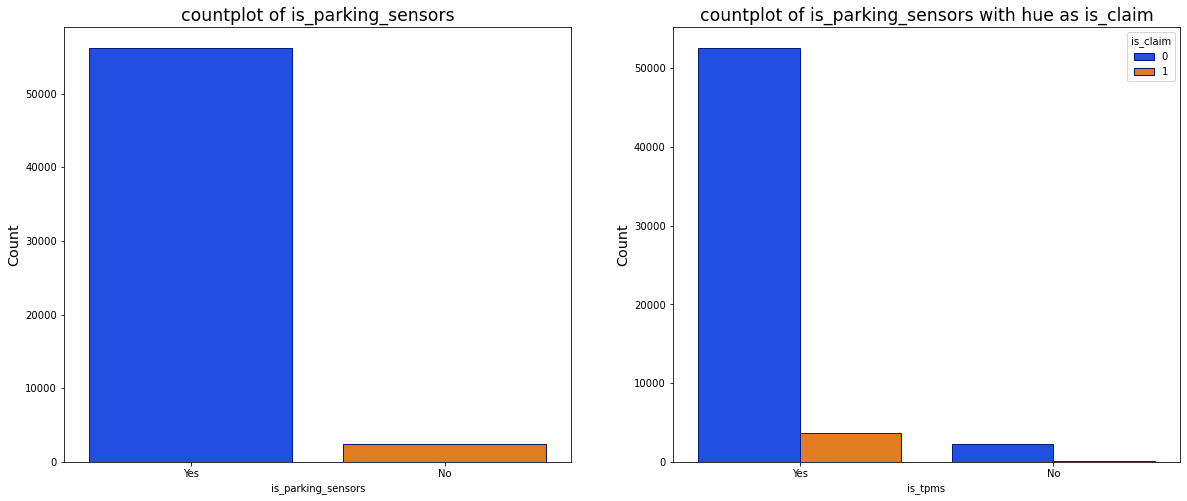

In [54]:
#is_parking_sensors
print(data['is_parking_sensors'].value_counts())
print(data['is_parking_sensors'].nunique())
plt.subplots(1,2,figsize=(20,8))

plt.subplot(1,2,1)

sns.countplot(x=data['is_parking_sensors'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.title('countplot of is_parking_sensors',fontdict={'fontsize':'xx-large'})
plt.xlabel('is_parking_sensors')
plt.ylabel('Count',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)

sns.countplot(x=data['is_parking_sensors'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1),hue=data['is_claim'])
plt.title('countplot of is_parking_sensors with hue as is_claim',fontdict={'fontsize':'xx-large'})
plt.xlabel('is_tpms')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})

Yes    56219
No      2373
Name: is_parking_sensors, dtype: int64
2


Text(0, 0.5, 'Count')

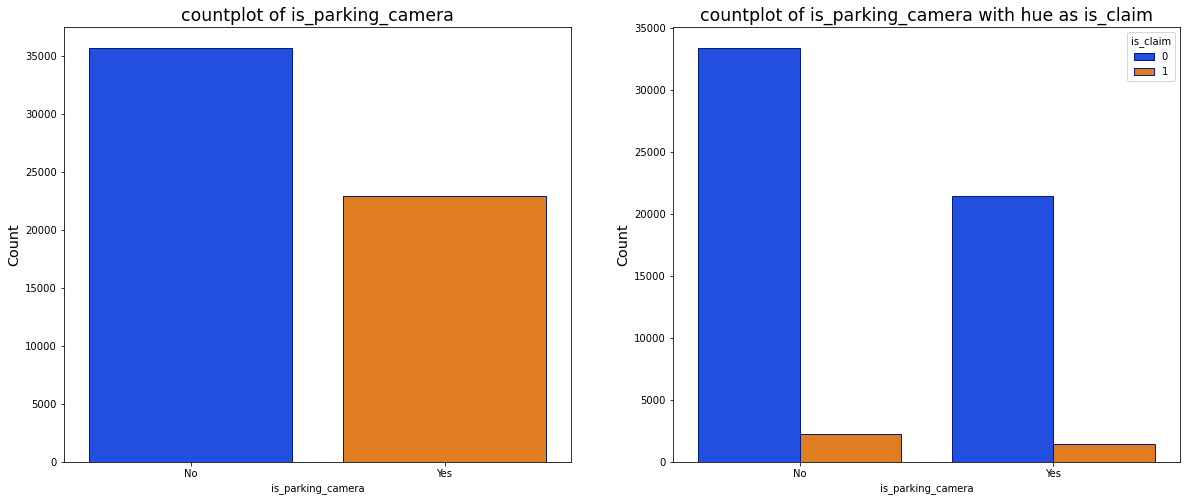

In [55]:
#is_parking_camera
print(data['is_parking_sensors'].value_counts())
print(data['is_parking_sensors'].nunique())
plt.subplots(1,2,figsize=(20,8))

plt.subplot(1,2,1)

sns.countplot(x=data['is_parking_camera'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.title('countplot of is_parking_camera',fontdict={'fontsize':'xx-large'})
plt.xlabel('is_parking_camera')
plt.ylabel('Count',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)

sns.countplot(x=data['is_parking_camera'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1),hue=data['is_claim'])
plt.title('countplot of is_parking_camera with hue as is_claim',fontdict={'fontsize':'xx-large'})
plt.xlabel('is_parking_camera')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})

Drum    44574
Disc    14018
Name: rear_brakes_type, dtype: int64
2


Text(0, 0.5, 'Count')

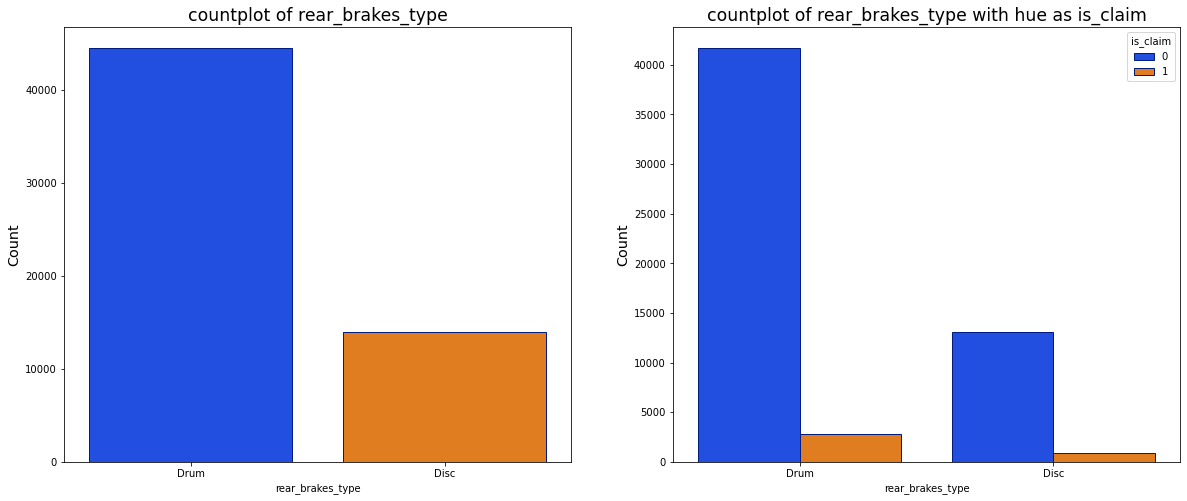

In [56]:
#is_parking_sensors
print(data['rear_brakes_type'].value_counts())
print(data['rear_brakes_type'].nunique())
plt.subplots(1,2,figsize=(20,8))

plt.subplot(1,2,1)

sns.countplot(x=data['rear_brakes_type'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.title('countplot of rear_brakes_type',fontdict={'fontsize':'xx-large'})
plt.xlabel('rear_brakes_type')
plt.ylabel('Count',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)

sns.countplot(x=data['rear_brakes_type'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1),hue=data['is_claim'])
plt.title('countplot of rear_brakes_type with hue as is_claim',fontdict={'fontsize':'xx-large'})
plt.xlabel('rear_brakes_type')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})

1197    17796
796     14948
1493    14018
998      4173
999      2373
1498     2114
1497     1598
1196     1209
1199      363
Name: displacement, dtype: int64
9


Text(0, 0.5, 'Count')

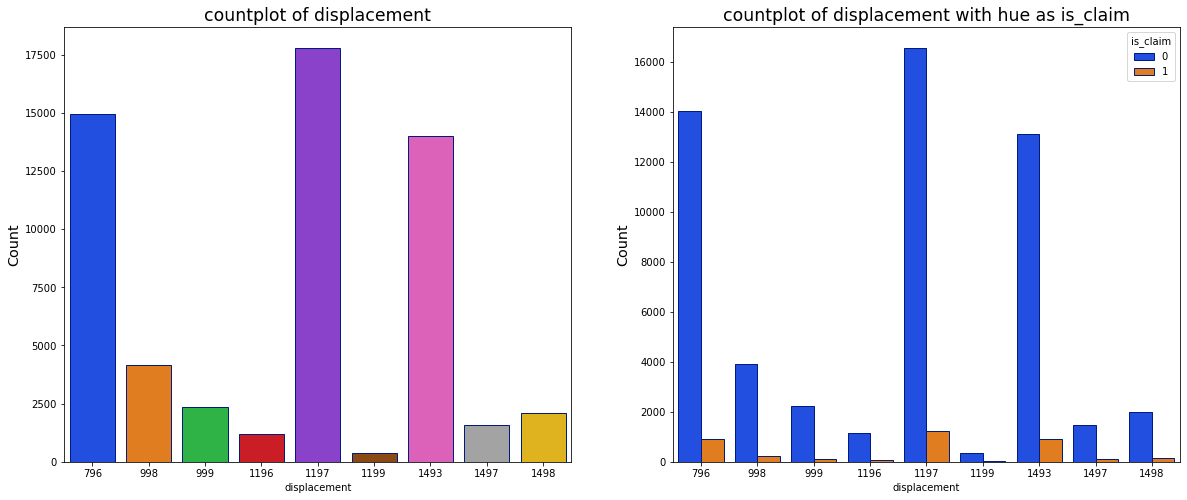

In [57]:
## displacement
print(data['displacement'].value_counts())
print(data['displacement'].nunique())
plt.subplots(1,2,figsize=(20,8))

plt.subplot(1,2,1)

sns.countplot(x=data['displacement'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.title('countplot of displacement',fontdict={'fontsize':'xx-large'})
plt.xlabel('displacement')
plt.ylabel('Count',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)

sns.countplot(x=data['displacement'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1),hue=data['is_claim'])
plt.title('countplot of displacement with hue as is_claim',fontdict={'fontsize':'xx-large'})
plt.xlabel('displacement')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})

4    36735
3    21857
Name: cylinder, dtype: int64
2


Text(0, 0.5, 'Count')

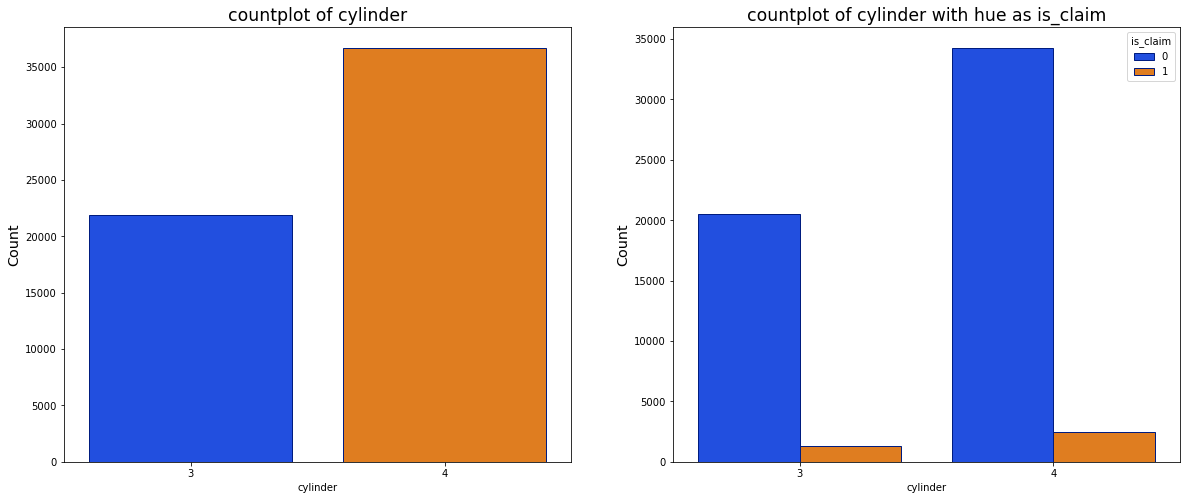

In [58]:
## cylinder
print(data['cylinder'].value_counts())
print(data['cylinder'].nunique())
plt.subplots(1,2,figsize=(20,8))

plt.subplot(1,2,1)

sns.countplot(x=data['cylinder'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.title('countplot of cylinder',fontdict={'fontsize':'xx-large'})
plt.xlabel('cylinder')
plt.ylabel('Count',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)

sns.countplot(x=data['cylinder'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1),hue=data['is_claim'])
plt.title('countplot of cylinder with hue as is_claim',fontdict={'fontsize':'xx-large'})
plt.xlabel('cylinder')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})

Manual       38181
Automatic    20411
Name: transmission_type, dtype: int64
2


Text(0, 0.5, 'Count')

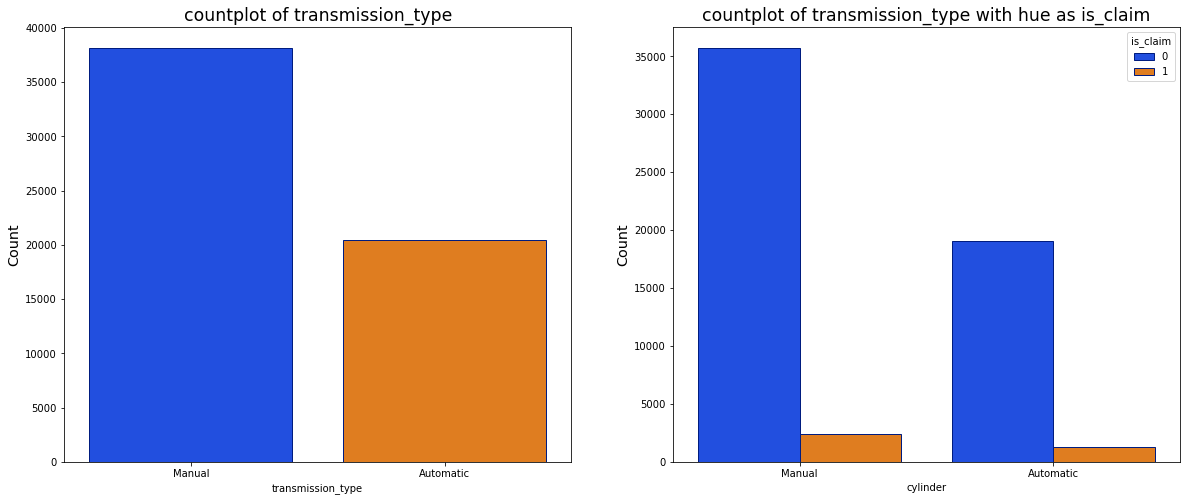

In [59]:
#transmission_type
print(data['transmission_type'].value_counts())
print(data['transmission_type'].nunique())
plt.subplots(1,2,figsize=(20,8))

plt.subplot(1,2,1)

sns.countplot(x=data['transmission_type'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.title('countplot of transmission_type',fontdict={'fontsize':'xx-large'})
plt.xlabel('transmission_type')
plt.ylabel('Count',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)

sns.countplot(x=data['transmission_type'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1),hue=data['is_claim'])
plt.title('countplot of transmission_type with hue as is_claim',fontdict={'fontsize':'xx-large'})
plt.xlabel('cylinder')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})

5    44211
6    14381
Name: gear_box, dtype: int64
2


Text(0, 0.5, 'Count')

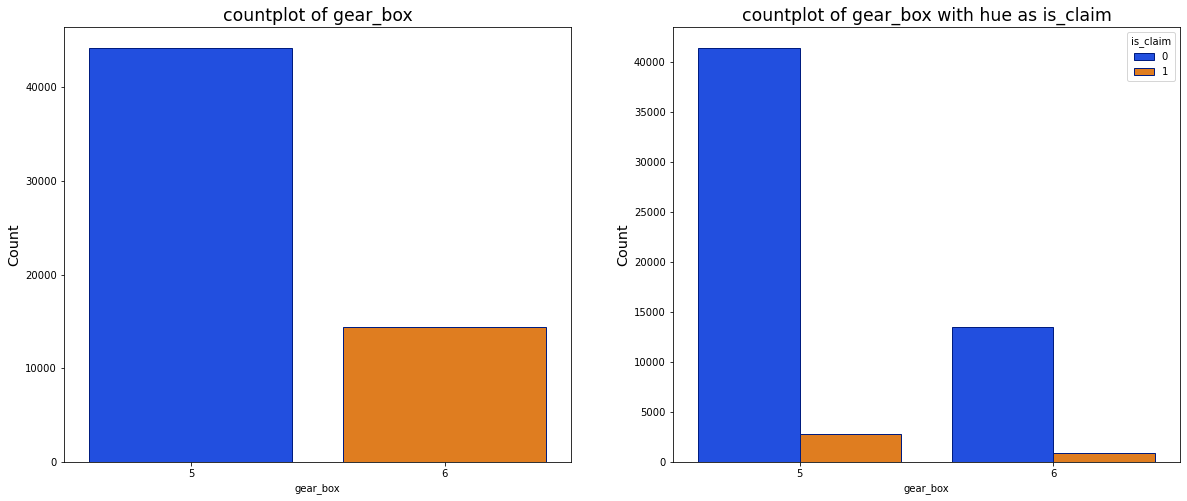

In [60]:
#gear_box
print(data['gear_box'].value_counts())
print(data['gear_box'].nunique())
plt.subplots(1,2,figsize=(20,8))

plt.subplot(1,2,1)

sns.countplot(x=data['gear_box'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.title('countplot of gear_box',fontdict={'fontsize':'xx-large'})
plt.xlabel('gear_box')
plt.ylabel('Count',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)

sns.countplot(x=data['gear_box'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1),hue=data['is_claim'])
plt.title('countplot of gear_box with hue as is_claim',fontdict={'fontsize':'xx-large'})
plt.xlabel('gear_box')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})

Power       33502
Electric    23881
Manual       1209
Name: steering_type, dtype: int64
3


Text(0, 0.5, 'Count')

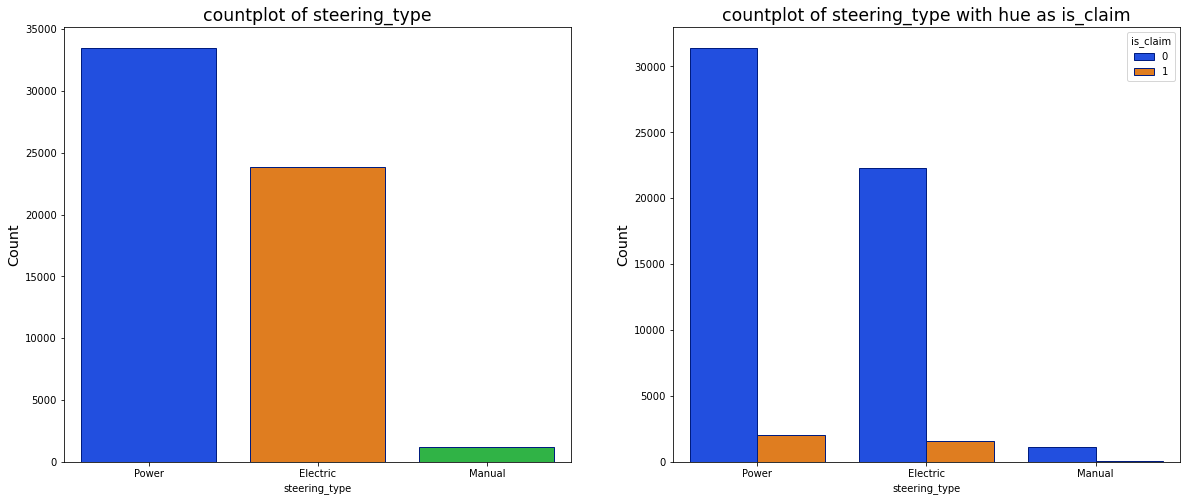

In [61]:
#steering_type
print(data['steering_type'].value_counts())
print(data['steering_type'].nunique())
plt.subplots(1,2,figsize=(20,8))

plt.subplot(1,2,1)

sns.countplot(x=data['steering_type'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.title('countplot of steering_type',fontdict={'fontsize':'xx-large'})
plt.xlabel('steering_type')
plt.ylabel('Count',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)

sns.countplot(x=data['steering_type'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1),hue=data['is_claim'])
plt.title('countplot of steering_type with hue as is_claim',fontdict={'fontsize':'xx-large'})
plt.xlabel('steering_type')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})

4.60    14948
4.80    14856
5.20    14018
4.70     4173
5.00     3971
4.85     2940
4.90     2114
4.50     1209
5.10      363
Name: turning_radius, dtype: int64
9


Text(0, 0.5, 'Count')

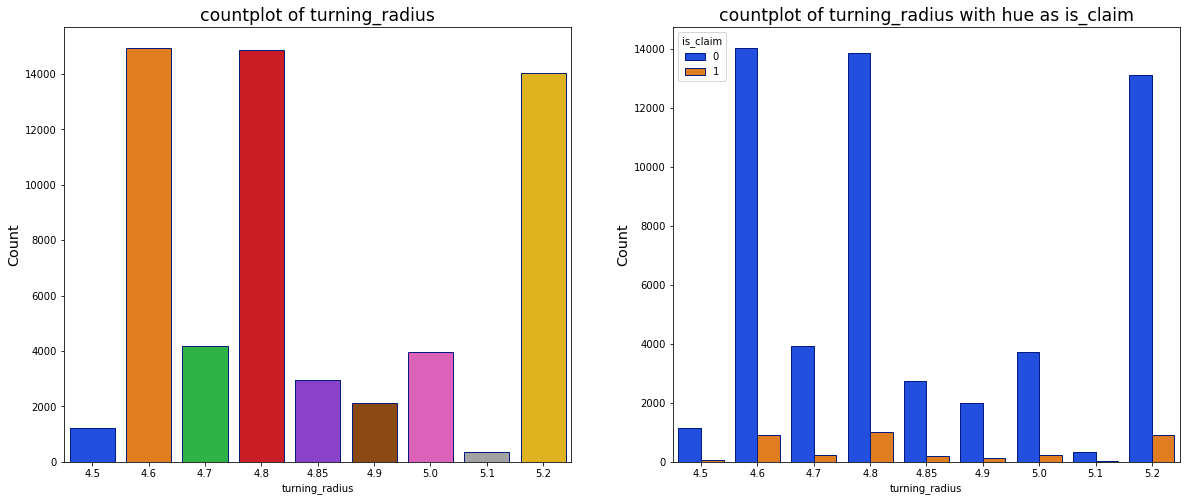

In [62]:
## turning_radius
print(data['turning_radius'].value_counts())
print(data['turning_radius'].nunique())
plt.subplots(1,2,figsize=(20,8))

plt.subplot(1,2,1)

sns.countplot(x=data['turning_radius'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.title('countplot of turning_radius',fontdict={'fontsize':'xx-large'})
plt.xlabel('turning_radius')
plt.ylabel('Count',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)

sns.countplot(x=data['turning_radius'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1),hue=data['is_claim'])
plt.title('countplot of turning_radius with hue as is_claim',fontdict={'fontsize':'xx-large'})
plt.xlabel('turning_radius')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})

In [63]:
#data.columns

Yes    33928
No     24664
Name: is_front_fog_lights, dtype: int64
2


Text(0, 0.5, 'Count')

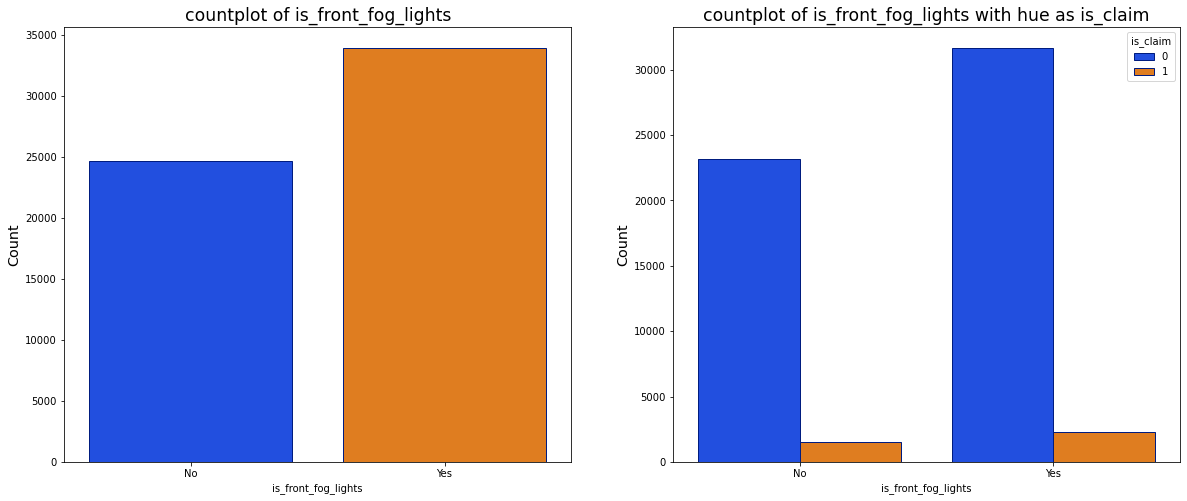

In [64]:
#is_front_fog_lights

print(data['is_front_fog_lights'].value_counts())
print(data['is_front_fog_lights'].nunique())
plt.subplots(1,2,figsize=(20,8))

plt.subplot(1,2,1)

sns.countplot(x=data['is_front_fog_lights'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.title('countplot of is_front_fog_lights',fontdict={'fontsize':'xx-large'})
plt.xlabel('is_front_fog_lights')
plt.ylabel('Count',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)

sns.countplot(x=data['is_front_fog_lights'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1),hue=data['is_claim'])
plt.title('countplot of is_front_fog_lights with hue as is_claim',fontdict={'fontsize':'xx-large'})
plt.xlabel('is_front_fog_lights')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})

No     41634
Yes    16958
Name: is_rear_window_wiper, dtype: int64
2


Text(0, 0.5, 'Count')

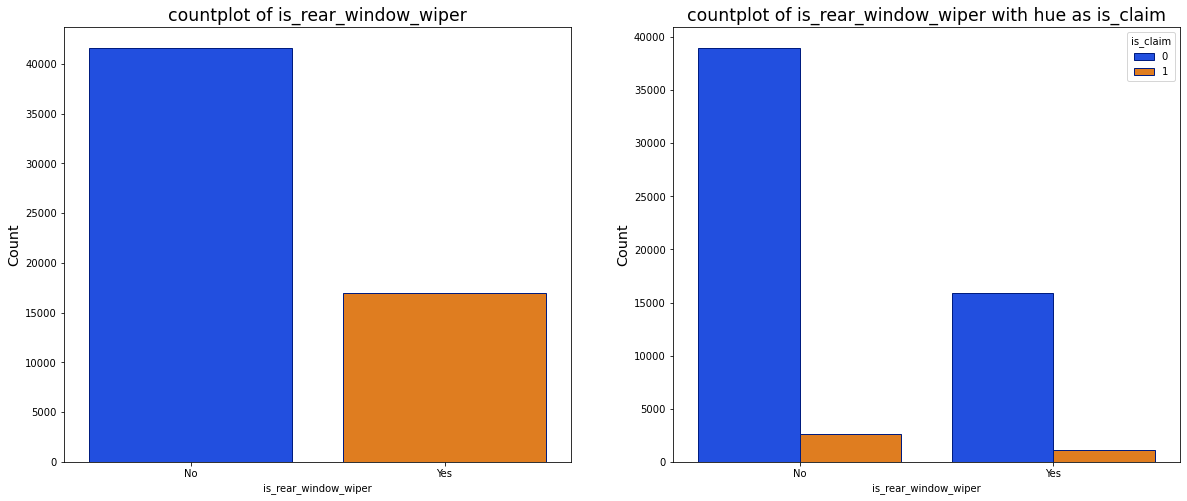

In [65]:
#is_rear_window_wiper
print(data['is_rear_window_wiper'].value_counts())
print(data['is_rear_window_wiper'].nunique())
plt.subplots(1,2,figsize=(20,8))

plt.subplot(1,2,1)

sns.countplot(x=data['is_rear_window_wiper'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.title('countplot of is_rear_window_wiper',fontdict={'fontsize':'xx-large'})
plt.xlabel('is_rear_window_wiper')
plt.ylabel('Count',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)

sns.countplot(x=data['is_rear_window_wiper'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1),hue=data['is_claim'])
plt.title('countplot of is_rear_window_wiper with hue as is_claim',fontdict={'fontsize':'xx-large'})
plt.xlabel('is_rear_window_wiper')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})

No     41634
Yes    16958
Name: is_rear_window_washer, dtype: int64
2


Text(0, 0.5, 'Count')

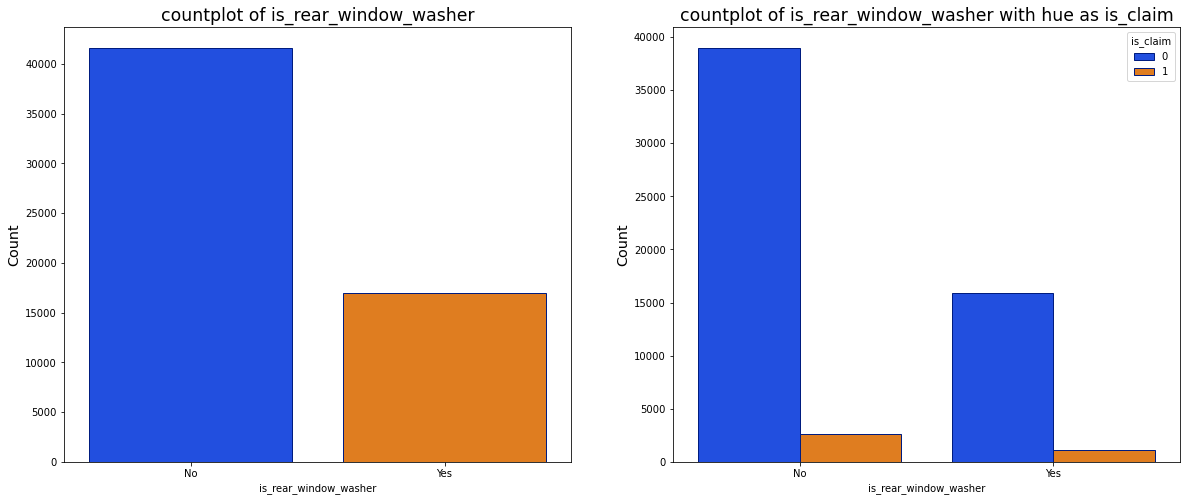

In [66]:
#is_rear_window_washer

print(data['is_rear_window_washer'].value_counts())
print(data['is_rear_window_washer'].nunique())
plt.subplots(1,2,figsize=(20,8))

plt.subplot(1,2,1)

sns.countplot(x=data['is_rear_window_washer'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.title('countplot of is_rear_window_washer',fontdict={'fontsize':'xx-large'})
plt.xlabel('is_rear_window_washer')
plt.ylabel('Count',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)

sns.countplot(x=data['is_rear_window_washer'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1),hue=data['is_claim'])
plt.title('countplot of is_rear_window_washer with hue as is_claim',fontdict={'fontsize':'xx-large'})
plt.xlabel('is_rear_window_washer')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})

Yes    32177
No     26415
Name: is_brake_assist, dtype: int64
2


Text(0, 0.5, 'Count')

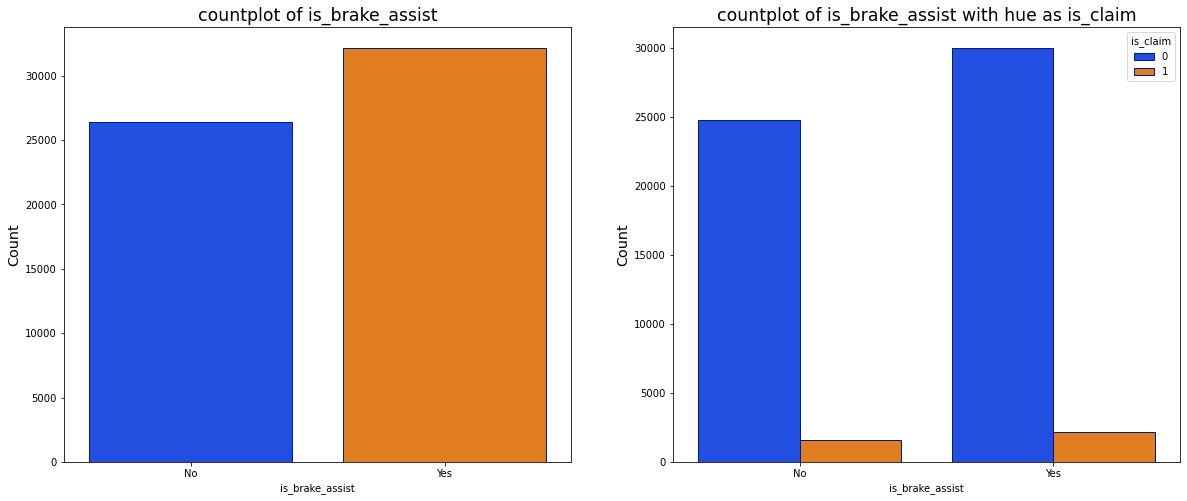

In [67]:
#is_brake_assist
print(data['is_brake_assist'].value_counts())
print(data['is_brake_assist'].nunique())
plt.subplots(1,2,figsize=(20,8))

plt.subplot(1,2,1)

sns.countplot(x=data['is_brake_assist'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.title('countplot of is_brake_assist',fontdict={'fontsize':'xx-large'})
plt.xlabel('is_brake_assist')
plt.ylabel('Count',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)

sns.countplot(x=data['is_brake_assist'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1),hue=data['is_claim'])
plt.title('countplot of is_brake_assist with hue as is_claim',fontdict={'fontsize':'xx-large'})
plt.xlabel('is_brake_assist')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})

Yes    42435
No     16157
Name: is_power_door_locks, dtype: int64
2


Text(0, 0.5, 'Count')

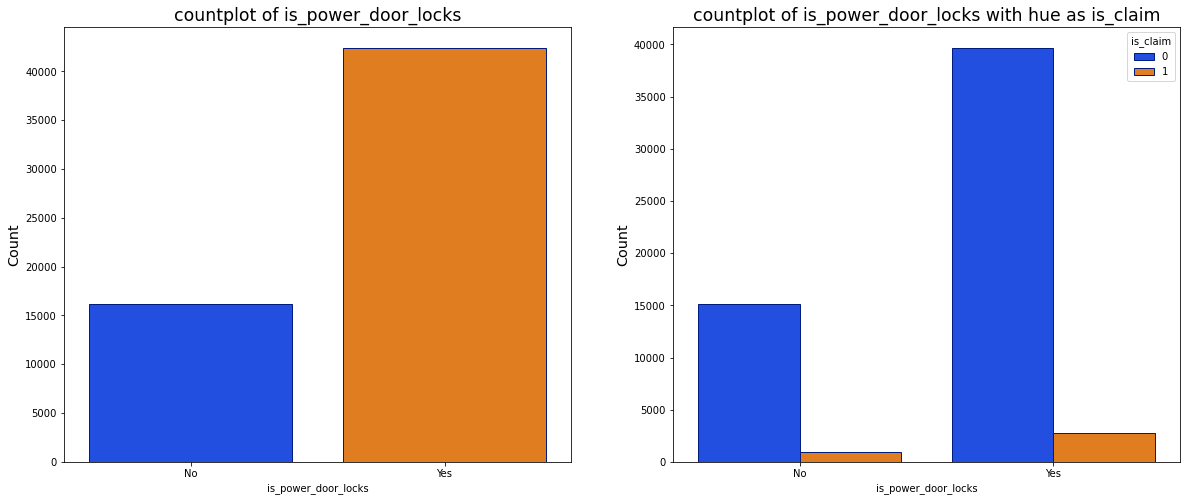

In [68]:
#is_power_door_locks
print(data['is_power_door_locks'].value_counts())
print(data['is_power_door_locks'].nunique())
plt.subplots(1,2,figsize=(20,8))

plt.subplot(1,2,1)

sns.countplot(x=data['is_power_door_locks'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.title('countplot of is_power_door_locks',fontdict={'fontsize':'xx-large'})
plt.xlabel('is_power_door_locks')
plt.ylabel('Count',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)

sns.countplot(x=data['is_power_door_locks'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1),hue=data['is_claim'])
plt.title('countplot of is_power_door_locks with hue as is_claim',fontdict={'fontsize':'xx-large'})
plt.xlabel('is_power_door_locks')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})

Yes    42435
No     16157
Name: is_central_locking, dtype: int64
2


Text(0, 0.5, 'Count')

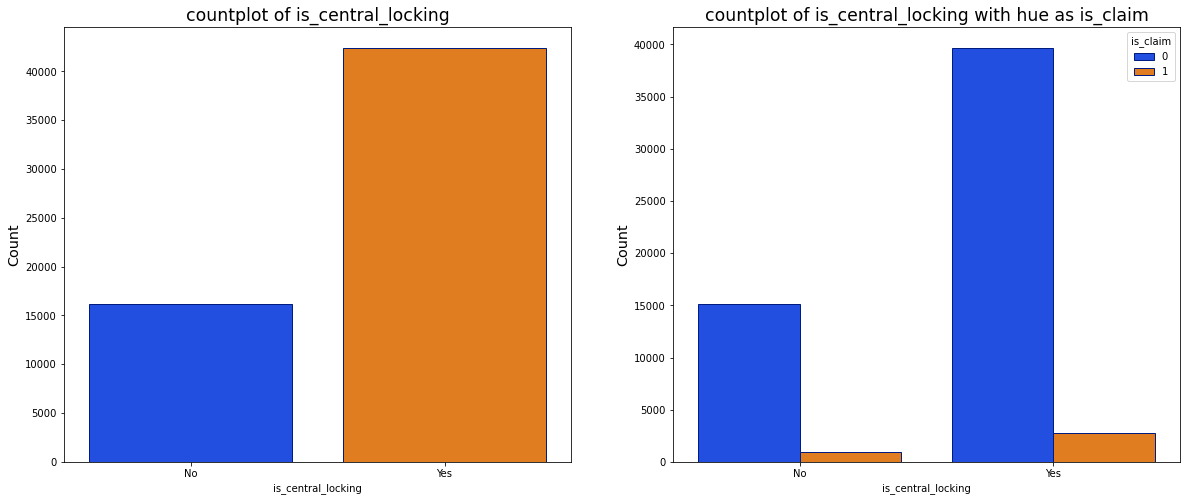

In [69]:
#is_central_locking
print(data['is_central_locking'].value_counts())
print(data['is_central_locking'].nunique())
plt.subplots(1,2,figsize=(20,8))

plt.subplot(1,2,1)

sns.countplot(x=data['is_central_locking'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.title('countplot of is_central_locking',fontdict={'fontsize':'xx-large'})
plt.xlabel('is_central_locking')
plt.ylabel('Count',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)

sns.countplot(x=data['is_central_locking'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1),hue=data['is_claim'])
plt.title('countplot of is_central_locking with hue as is_claim',fontdict={'fontsize':'xx-large'})
plt.xlabel('is_central_locking')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})

Yes    57383
No      1209
Name: is_power_steering, dtype: int64
2


Text(0, 0.5, 'Count')

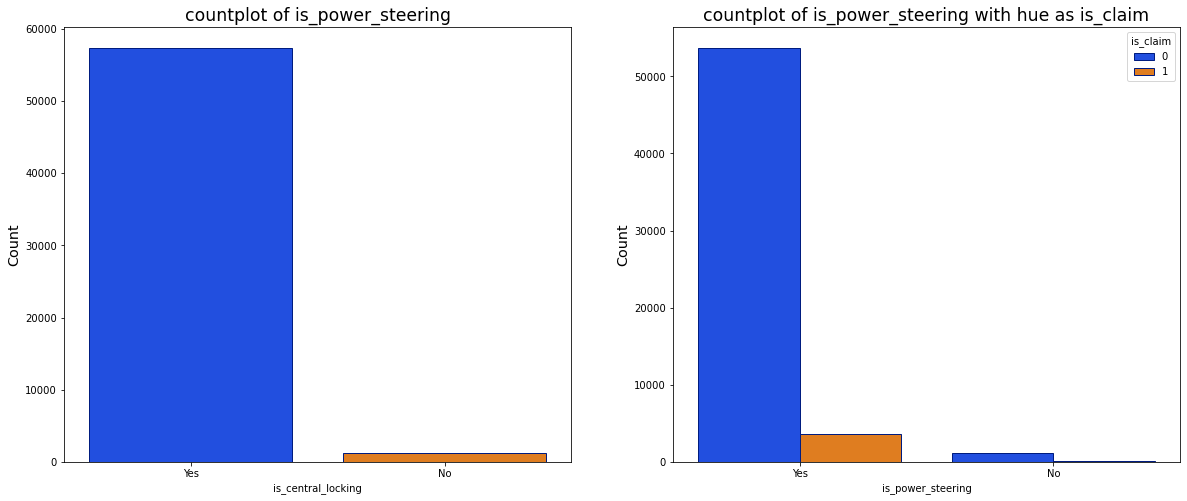

In [70]:
#is_power_steering
print(data['is_power_steering'].value_counts())
print(data['is_power_steering'].nunique())
plt.subplots(1,2,figsize=(20,8))

plt.subplot(1,2,1)

sns.countplot(x=data['is_power_steering'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.title('countplot of is_power_steering',fontdict={'fontsize':'xx-large'})
plt.xlabel('is_central_locking')
plt.ylabel('Count',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)

sns.countplot(x=data['is_power_steering'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1),hue=data['is_claim'])
plt.title('countplot of is_power_steering with hue as is_claim',fontdict={'fontsize':'xx-large'})
plt.xlabel('is_power_steering')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})

Yes    34291
No     24301
Name: is_driver_seat_height_adjustable, dtype: int64
2


Text(0, 0.5, 'Count')

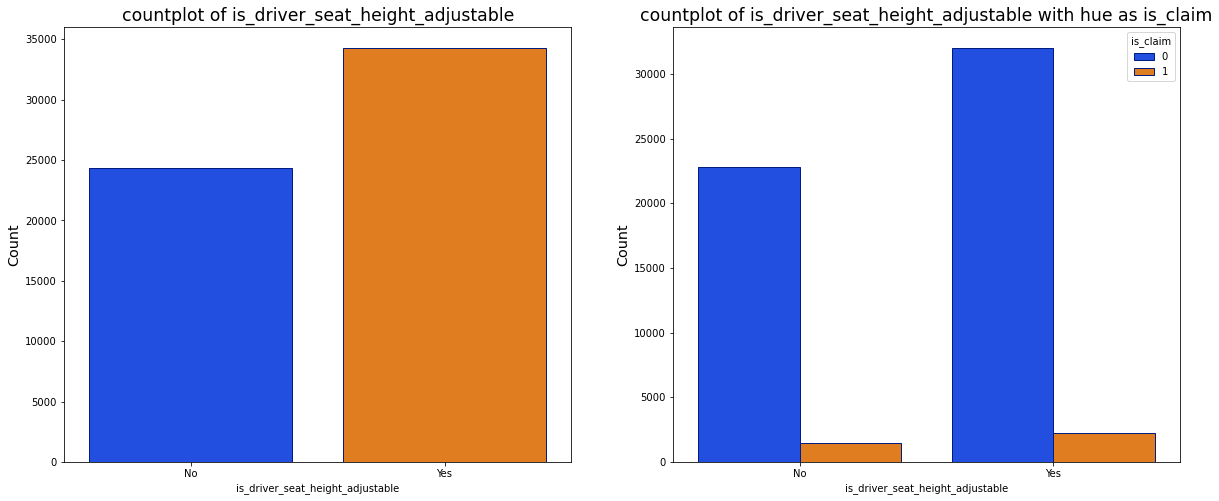

In [71]:
#is_driver_seat_height_adjustable

print(data['is_driver_seat_height_adjustable'].value_counts())
print(data['is_driver_seat_height_adjustable'].nunique())
plt.subplots(1,2,figsize=(20,8))

plt.subplot(1,2,1)

sns.countplot(x=data['is_driver_seat_height_adjustable'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.title('countplot of is_driver_seat_height_adjustable',fontdict={'fontsize':'xx-large'})
plt.xlabel('is_driver_seat_height_adjustable')
plt.ylabel('Count',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)

sns.countplot(x=data['is_driver_seat_height_adjustable'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1),hue=data['is_claim'])
plt.title('countplot of is_driver_seat_height_adjustable with hue as is_claim',fontdict={'fontsize':'xx-large'})
plt.xlabel('is_driver_seat_height_adjustable')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})

No     36309
Yes    22283
Name: is_day_night_rear_view_mirror, dtype: int64
2


Text(0, 0.5, 'Count')

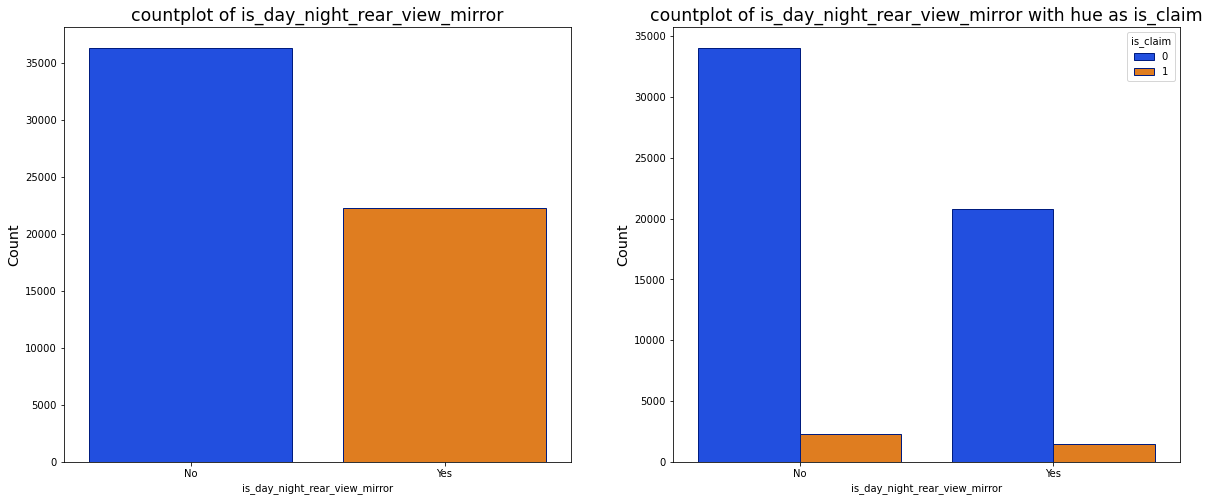

In [72]:
#is_day_night_rear_view_mirror

print(data['is_day_night_rear_view_mirror'].value_counts())
print(data['is_day_night_rear_view_mirror'].nunique())
plt.subplots(1,2,figsize=(20,8))

plt.subplot(1,2,1)

sns.countplot(x=data['is_day_night_rear_view_mirror'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.title('countplot of is_day_night_rear_view_mirror',fontdict={'fontsize':'xx-large'})
plt.xlabel('is_day_night_rear_view_mirror')
plt.ylabel('Count',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)

sns.countplot(x=data['is_day_night_rear_view_mirror'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1),hue=data['is_claim'])
plt.title('countplot of is_day_night_rear_view_mirror with hue as is_claim',fontdict={'fontsize':'xx-large'})
plt.xlabel('is_day_night_rear_view_mirror')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})

In [73]:
##TN shoud be less

Yes    42435
No     16157
Name: is_ecw, dtype: int64
2


Text(0, 0.5, 'Count')

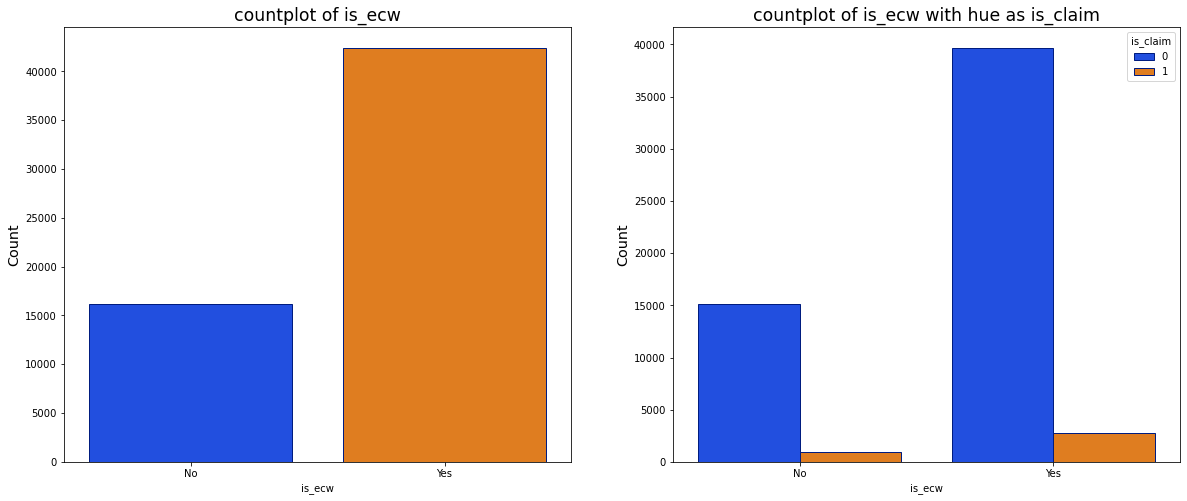

In [74]:
#is_ecw
print(data['is_ecw'].value_counts())
print(data['is_ecw'].nunique())
plt.subplots(1,2,figsize=(20,8))

plt.subplot(1,2,1)

sns.countplot(x=data['is_ecw'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.title('countplot of is_ecw',fontdict={'fontsize':'xx-large'})
plt.xlabel('is_ecw')
plt.ylabel('Count',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)

sns.countplot(x=data['is_ecw'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1),hue=data['is_claim'])
plt.title('countplot of is_ecw with hue as is_claim',fontdict={'fontsize':'xx-large'})
plt.xlabel('is_ecw')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})

Yes    58229
No       363
Name: is_speed_alert, dtype: int64
2


Text(0, 0.5, 'Count')

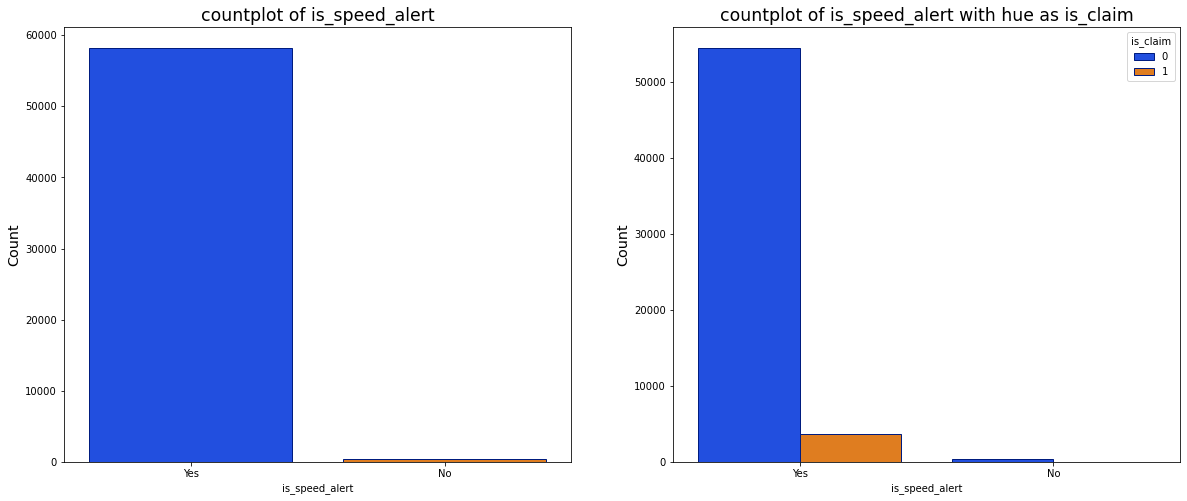

In [75]:
#is_speed_alert
print(data['is_speed_alert'].value_counts())
print(data['is_speed_alert'].nunique())
plt.subplots(1,2,figsize=(20,8))

plt.subplot(1,2,1)

sns.countplot(x=data['is_speed_alert'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.title('countplot of is_speed_alert',fontdict={'fontsize':'xx-large'})
plt.xlabel('is_speed_alert')
plt.ylabel('Count',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)

sns.countplot(x=data['is_speed_alert'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1),hue=data['is_claim'])
plt.title('countplot of is_speed_alert with hue as is_claim',fontdict={'fontsize':'xx-large'})
plt.xlabel('is_speed_alert')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})

5


Text(0, 0.5, 'Count')

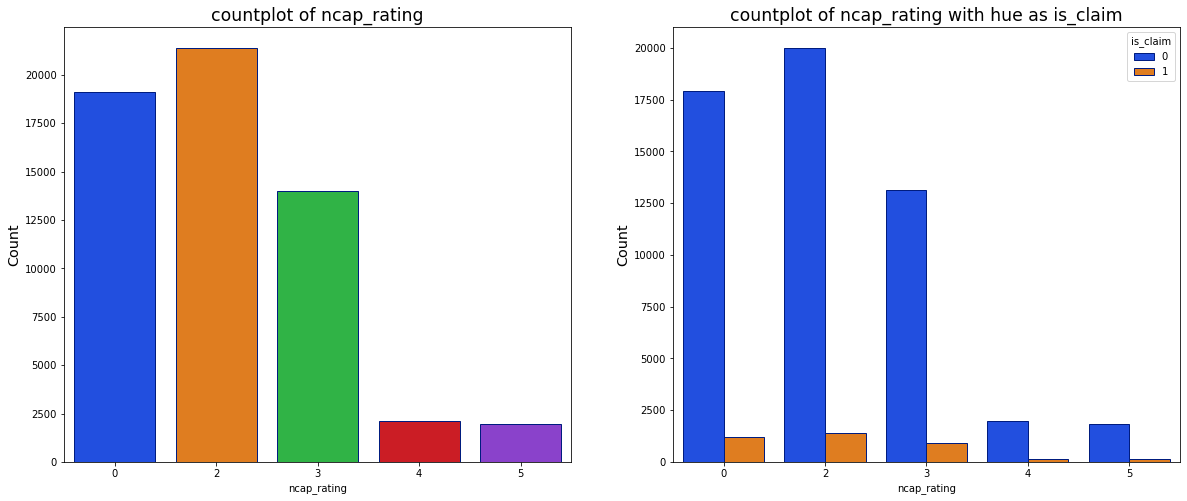

In [76]:
#ncap_rating
print(data['ncap_rating'].nunique())
plt.subplots(1,2,figsize=(20,8))

plt.subplot(1,2,1)

sns.countplot(x=data['ncap_rating'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.title('countplot of ncap_rating',fontdict={'fontsize':'xx-large'})
plt.xlabel('ncap_rating')
plt.ylabel('Count',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)

sns.countplot(x=data['ncap_rating'],  data = data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1),hue=data['is_claim'])
plt.title('countplot of ncap_rating with hue as is_claim',fontdict={'fontsize':'xx-large'})
plt.xlabel('ncap_rating')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})

In [77]:
# data.hist(figsize=(12, 10))
# plt.tight_layout()  # Adjust the spacing between subplots
# plt.show()

In [78]:
#The highest number of claims (about 1000) comes from area C8.
# Owners of models M1, M4, and M6 have the highest claims (about 1000 each).
# There are zero claims where the speed alert system isn't present in the car.


In [79]:
df=data.copy()

In [80]:
### Dropping policy ID which is not of any use
df.drop(['policy_id'],inplace=True,axis=1)

In [81]:
## Converting max_torque into numerical
import re
df['torque'] = df['max_torque'].apply(lambda x: re.findall(r'\d+\.?\d*(?=Nm)', x)[0])
df['rpm'] = df['max_torque'].apply(lambda x: re.findall(r'\d+\.?\d*(?=rpm)', x)[0])

# Convert the columns to numeric data type
df['torque'] = pd.to_numeric(df['torque'])
df['rpm'] = pd.to_numeric(df['rpm'])

# Calculate torque to RPM ratio 
df['torque to rpm ratio'] = df['torque'] / df['rpm']

In [82]:
df.drop('max_torque', axis=1,inplace=True)
df.drop('rpm',axis=1,inplace=True)
df.drop('torque',axis=1,inplace=True)

In [83]:
### Converting max_power to numerical
df['power'] = df['max_power'].apply(lambda x: re.findall(r'\d+\.?\d*(?=bhp)', x)[0])
df['rpm'] = df['max_power'].apply(lambda x: re.findall(r'\d+', x)[-1])

# Convert the columns to numeric data type
df['power'] = pd.to_numeric(df['power'])
df['rpm'] = pd.to_numeric(df['rpm'])

# Calculate power to RPM ratio
df['power to rpm ratio'] = df['power'] / df['rpm']

In [84]:
df.drop('power', axis=1,inplace=True)
df.drop('rpm',axis=1,inplace=True)
df.drop('max_power',axis=1,inplace=True)

In [85]:
df.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,...,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,torque to rpm ratio,power to rpm ratio
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,F8D Petrol Engine,...,No,Yes,No,No,No,Yes,0,0,0.017143,0.006727
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,F8D Petrol Engine,...,No,Yes,No,No,No,Yes,0,0,0.017143,0.006727
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,F8D Petrol Engine,...,No,Yes,No,No,No,Yes,0,0,0.017143,0.006727
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,1.2 L K12N Dualjet,...,Yes,Yes,Yes,Yes,Yes,Yes,2,0,0.025682,0.014750
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,1.0 SCe,...,Yes,Yes,No,Yes,Yes,Yes,2,0,0.021412,0.012193


In [86]:
is_cols=[col for col in df.columns if col.startswith("is") and col!="is_claim"]
print(is_cols)

['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']


In [87]:
df = df.replace({ "No" : 0 , "Yes" : 1 })

In [88]:
dataset_num_col = df.select_dtypes(include=['int', 'float']).columns
print(" Data Set Numerical columns:")
print(dataset_num_col.nunique())
print(dataset_num_col)

 Data Set Numerical columns:
35
Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'displacement', 'cylinder', 'gear_box',
       'turning_radius', 'length', 'width', 'height', 'gross_weight',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim',
       'torque to rpm ratio', 'power to rpm ratio'],
      dtype='object')


In [89]:
dataset_cat_cols = df.select_dtypes(include=['object']).columns
print("Data Set categorical columns:")
print(dataset_cat_cols.nunique())
print(dataset_cat_cols)

Data Set categorical columns:
8
Index(['area_cluster', 'segment', 'model', 'fuel_type', 'engine_type',
       'rear_brakes_type', 'transmission_type', 'steering_type'],
      dtype='object')


policy_tenure             AxesSubplot(0.125,0.787927;0.133621x0.0920732)
age_of_car             AxesSubplot(0.285345,0.787927;0.133621x0.0920732)
age_of_policyholder     AxesSubplot(0.44569,0.787927;0.133621x0.0920732)
dtype: object

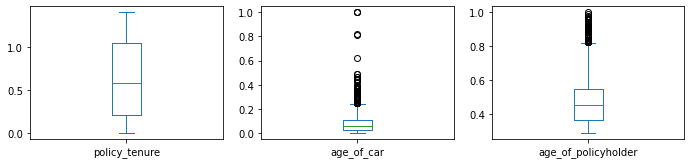

In [90]:
df1=df[['policy_tenure','age_of_car','age_of_policyholder']]

df1.plot(kind="box", subplots=True, layout=(7,5),figsize=(20,20))

### Here as age of car matters we willnot do outlier removal 

In [91]:
Q1=df1.quantile(0.25)
Q3=df1.quantile(0.75)
IQR=Q3-Q1
print(IQR)
LF=Q1 - 1.5 * IQR
UF=Q3 + 1.5 * IQR
dict1=dict(IQR)
num_cols=list(dict1.keys())
df1[num_cols]=np.where(df1[num_cols]>UF,UF,np.where(df1[num_cols]<LF,LF,df1[num_cols])) 
df1

policy_tenure          0.828855
age_of_car             0.090000
age_of_policyholder    0.182692
dtype: float64


,policy_tenure,age_of_car,age_of_policyholder
0,0.515874,0.05,0.644231
1,0.672619,0.02,0.375000
2,0.841110,0.02,0.384615
3,0.900277,0.11,0.432692
4,0.596403,0.11,0.634615
...,...,...,...
58587,0.355089,0.13,0.644231
58588,1.199642,0.02,0.519231
58589,1.162273,0.05,0.451923
58590,1.236307,0.14,0.557692


policy_tenure             AxesSubplot(0.125,0.787927;0.133621x0.0920732)
age_of_car             AxesSubplot(0.285345,0.787927;0.133621x0.0920732)
age_of_policyholder     AxesSubplot(0.44569,0.787927;0.133621x0.0920732)
dtype: object

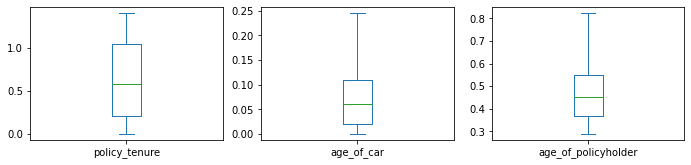

In [92]:

df1.plot(kind="box", subplots=True, layout=(7,5),figsize=(20,20))

In [93]:
#df[num_cols]=np.where(df[num_cols]>UF,UF,np.where(df[num_cols]<LF,LF,df[num_cols])) 
df

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,...,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,torque to rpm ratio,power to rpm ratio
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,F8D Petrol Engine,...,0,1,0,0,0,1,0,0,0.017143,0.006727
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,F8D Petrol Engine,...,0,1,0,0,0,1,0,0,0.017143,0.006727
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,F8D Petrol Engine,...,0,1,0,0,0,1,0,0,0.017143,0.006727
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,1.2 L K12N Dualjet,...,1,1,1,1,1,1,2,0,0.025682,0.014750
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,1.0 SCe,...,1,1,0,1,1,1,2,0,0.021412,0.012193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,1.0 SCe,...,1,1,0,1,1,1,2,0,0.021412,0.012193
58588,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,F8D Petrol Engine,...,0,1,0,0,0,1,0,0,0.017143,0.006727
58589,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,F8D Petrol Engine,...,0,1,0,0,0,1,0,0,0.017143,0.006727
58590,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,K Series Dual jet,...,1,1,1,1,1,1,2,0,0.025682,0.014750


## MinMax Scaler

In [94]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [95]:
#lets separate numerical and categorical features for scaling and encoding
num = df._get_numeric_data()
cat = df.select_dtypes(include=['object'])

In [96]:
num.shape

(58592, 35)

In [97]:
cat.shape

(58592, 8)

In [98]:
#Lets bring all numerical features to common scale by applying MinMax scaler
scaler = MinMaxScaler()
df_num = scaler.fit_transform(num)
df_num = pd.DataFrame(df_num,columns=num.columns)

In [99]:
#combine both numerical and categorical features
df1 = pd.concat([df_num,cat], axis = 1)

In [100]:
df1.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'displacement', 'cylinder', 'gear_box',
       'turning_radius', 'length', 'width', 'height', 'gross_weight',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim',
       'torque to rpm ratio', 'power to rpm ratio', 'area_cluster', 'segment',
       'model', 'fuel_type', 'engine_type', 'rear_brakes_type',
       'transmission_type', 'steering_type'],
      dtype='object')

## Label Encoder

In [102]:
#lets convert categorical data into numeric values, using LabelEncoder
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for i in df1.columns:
    if df1[i].dtypes == "object" :
        df1[i] = enc.fit_transform(df1[i])
        #X[i] = enc.fit_transform(X[i].values.reshape(-1,1))

In [103]:
df1.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,...,torque to rpm ratio,power to rpm ratio,area_cluster,segment,model,fuel_type,engine_type,rear_brakes_type,transmission_type,steering_type
0,0.368130,0.05,0.500000,0.064260,0.00,0.2,0.0,0.0,0.0,1.0,...,0.000000,0.000000,0,0,0,0,6,1,1,2
1,0.480580,0.02,0.121622,0.365231,0.00,0.2,0.0,0.0,0.0,1.0,...,0.000000,0.000000,11,0,0,0,6,1,1,2
2,0.601457,0.02,0.135135,0.051764,0.00,0.2,0.0,0.0,0.0,1.0,...,0.000000,0.000000,15,0,0,0,6,1,1,2
3,0.643904,0.11,0.202703,0.291660,0.00,0.2,1.0,1.0,0.0,1.0,...,0.087901,0.370835,16,3,3,2,2,1,0,0
4,0.425902,0.11,0.486486,0.470987,0.25,0.2,0.0,0.0,0.0,0.0,...,0.043945,0.252639,17,0,4,2,0,1,0,0


In [104]:
X = df1.drop(columns = 'is_claim')
Y = df1['is_claim']

In [105]:
df1.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'displacement', 'cylinder', 'gear_box',
       'turning_radius', 'length', 'width', 'height', 'gross_weight',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim',
       'torque to rpm ratio', 'power to rpm ratio', 'area_cluster', 'segment',
       'model', 'fuel_type', 'engine_type', 'rear_brakes_type',
       'transmission_type', 'steering_type'],
      dtype='object')

##  Correlation Skewness ,Curtosis

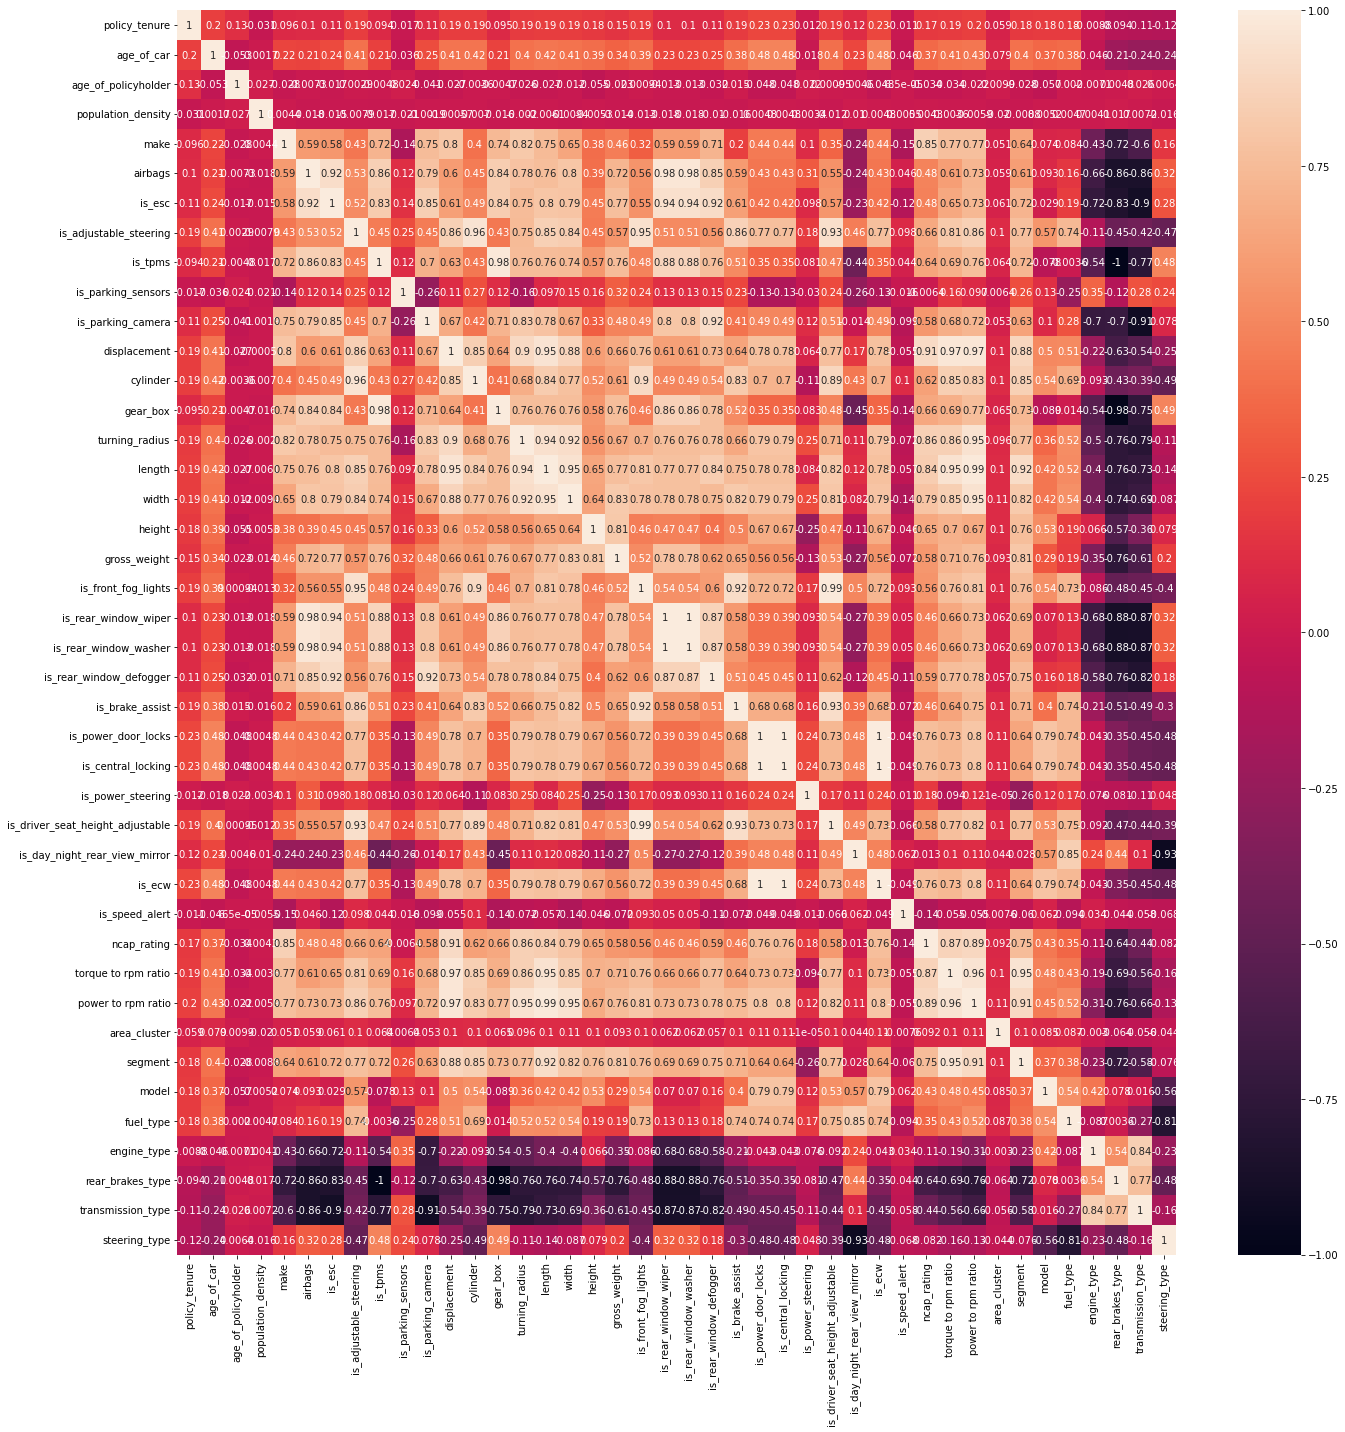

In [106]:
#Lets plot heatmap to check correlation among differnt features and label
corr_matrix = X.corr(method="spearman")
plt.figure(figsize = (20,20))
sns.heatmap(corr_matrix,annot=True)
plt.tight_layout()

In [107]:
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))

In [108]:
neg_corr=[column for column in upper.columns if any(upper[column]<=-0.8)]
pos_corr=[column for column in upper.columns if any(upper[column]>=0.8)]

In [109]:
print("high negative corr \n", neg_corr)
print("high positive corr \n", pos_corr)

high negative corr 
 ['rear_brakes_type', 'transmission_type', 'steering_type']
high positive corr 
 ['is_esc', 'is_tpms', 'is_parking_camera', 'displacement', 'cylinder', 'gear_box', 'turning_radius', 'length', 'width', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_central_locking', 'is_driver_seat_height_adjustable', 'is_ecw', 'ncap_rating', 'torque to rpm ratio', 'power to rpm ratio', 'segment', 'fuel_type', 'transmission_type']


In [110]:
total_corr=neg_corr+pos_corr
print("no. of high corr columns need to drop \n",len(total_corr))

no. of high corr columns need to drop 
 27


In [111]:
X.shape

(58592, 42)

In [112]:
X_final=X.drop(total_corr,axis=1)

In [113]:
X_final.shape

(58592, 16)

In [114]:
X_final.skew()

policy_tenure                     0.053588
age_of_car                        1.094081
age_of_policyholder               0.640049
population_density                1.674178
make                              1.197457
airbags                           0.905946
is_adjustable_steering           -0.435281
is_parking_sensors               -4.662020
height                            1.035498
is_power_door_locks              -1.003601
is_power_steering                -6.744375
is_day_night_rear_view_mirror     0.493118
is_speed_alert                  -12.586692
area_cluster                     -0.535119
model                            -0.328722
engine_type                      -0.303587
dtype: float64

In [115]:
X_final.kurt()

policy_tenure                     -1.498350
age_of_car                         5.301345
age_of_policyholder               -0.156782
population_density                 2.588797
make                               0.336315
airbags                           -1.135791
is_adjustable_steering            -1.810592
is_parking_sensors                19.735105
height                             0.726162
is_power_door_locks               -0.992819
is_power_steering                 43.488075
is_day_night_rear_view_mirror     -1.756894
is_speed_alert                   156.430154
area_cluster                      -1.151976
model                             -1.158747
engine_type                       -0.984058
dtype: float64

In [116]:
#Lets treat the skewness from numerical columns
for index in X_final.skew().index:
    if X_final.skew().loc[index]>0.5:
        X_final[index]=np.sqrt(X_final[index])
    if X_final.skew().loc[index]<-0.5:
        X_final[index]=np.sqrt(X_final[index])

In [117]:
#check the skewness again
X_final.skew()

policy_tenure                     0.053588
age_of_car                       -0.200690
age_of_policyholder              -0.267286
population_density                0.802207
make                              0.773499
airbags                           0.651812
is_adjustable_steering           -0.435281
is_parking_sensors               -4.662020
height                            0.017544
is_power_door_locks              -1.003601
is_power_steering                -6.744375
is_day_night_rear_view_mirror     0.493118
is_speed_alert                  -12.586692
area_cluster                     -1.063042
model                            -0.328722
engine_type                      -0.303587
dtype: float64

In [118]:
X_final.kurt()

policy_tenure                     -1.498350
age_of_car                        -0.555492
age_of_policyholder               -0.348178
population_density                 0.106515
make                              -1.194265
airbags                           -0.835858
is_adjustable_steering            -1.810592
is_parking_sensors                19.735105
height                            -1.102656
is_power_door_locks               -0.992819
is_power_steering                 43.488075
is_day_night_rear_view_mirror     -1.756894
is_speed_alert                   156.430154
area_cluster                       0.126579
model                             -1.158747
engine_type                       -0.984058
dtype: float64

In [119]:
#check the shape
X_final.shape,Y.shape


((58592, 16), (58592,))

In [120]:
#check value count for target variable
Y.value_counts()

0.0    54844
1.0     3748
Name: is_claim, dtype: int64

In [121]:
#lets split our data into train and test parts with best random_state
X_train,X_test,Y_train,Y_test = train_test_split(X_final, Y, test_size = 0.40, random_state = 59,stratify=Y)

In [122]:
X_train.shape,Y_train.shape

((35155, 16), (35155,))

In [123]:
Y_train.value_counts()

0.0    32906
1.0     2249
Name: is_claim, dtype: int64

### Oversampling

In [124]:
#lets do oversampling using SMOTE
import imblearn
from imblearn.over_sampling import SMOTE,RandomOverSampler,BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler,NearMiss,TomekLinks


In [125]:
SM = SMOTE(sampling_strategy='minority',random_state=42)
X_over,Y_over = SM.fit_resample(X_train,Y_train)

In [126]:
from imblearn.ensemble import BalancedBaggingClassifier

In [127]:
#lets check the count of target variable now
Y_over.value_counts()

0.0    32906
1.0    32906
Name: is_claim, dtype: int64

In [128]:
## Now the data is balenced

In [129]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression 
from matplotlib.colors import ListedColormap
from sklearn import metrics  ##confusion matrix and accuracy
from sklearn.metrics import precision_score,accuracy_score,recall_score
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score

In [130]:
#Lets find the best random state using LogisticRegression

max_accu = 0
max_rs = 0
for i in range(50,100):
    x_train,x_test,y_train,y_test = train_test_split(X_over,Y_over,test_size = 0.25, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > max_accu:
        max_accu = acc
        max_rs = i
print("Best accuracy is",max_accu,"on Random State",max_rs)

Best accuracy is 0.5959399501610648 on Random State 93


In [131]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(class_weight="balanced")
# fit the model with data
X_train.shape,y_train.shape

((35155, 16), (49359,))

In [132]:
logreg.fit(X_train,Y_train)

LogisticRegression(class_weight='balanced')

In [133]:
y_pred_train=logreg.predict(X_train)
y_pred_test=logreg.predict(X_test)


In [134]:
print("Accuracy Training:",metrics.accuracy_score(Y_train,y_pred_train))
print("Accuracy testing:",metrics.accuracy_score(Y_test,y_pred_test))


Accuracy Training: 0.5636751528943251
Accuracy testing: 0.5593292656910014


In [135]:
#Lets check the model with LogisticRegression
LR.fit(X_over,Y_over)
Y_predlr = LR.predict(X_test)

accuracy_lr = accuracy_score(Y_test,Y_predlr)*100
print(f"Accuracy Score:", accuracy_lr)
print(f"roc_auc_score: {roc_auc_score(Y_test,Y_predlr)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(Y_test,Y_predlr)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(Y_test,Y_predlr)}")

#Precision and recall
print(f"Precision : \n {precision_score(Y_test,Y_predlr)}\n")
print(f"Recall : \n {recall_score(Y_test,Y_predlr)}")

#cross validation score
scores = cross_val_score(LR, X_over, Y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy_lr - scores
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 56.15906472671417
roc_auc_score: 57.00358570100917
---------------------------------------------------
Confusion Matrix : 
 [[12293  9645]
 [  630   869]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       0.95      0.56      0.71     21938
         1.0       0.08      0.58      0.14      1499

    accuracy                           0.56     23437
   macro avg       0.52      0.57      0.42     23437
weighted avg       0.90      0.56      0.67     23437

Precision : 
 0.08265170249191554

Recall : 
 0.5797198132088058

Cross validation score : 58.78106974785532

Accuracy Score - Cross Validation Score : -2.622005021141149


In [144]:
#DecisionTreeClassifier model

In [145]:
#model with DecesionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(X_over,Y_over)
Y_pred_dt = dt.predict(X_test)

accuracy_dt = accuracy_score(Y_test,Y_pred_dt)*100

print(f"Accuracy Score:", accuracy_dt)
print(f"roc_auc_score: {roc_auc_score(Y_test,Y_pred_dt)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(Y_test,Y_pred_dt)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(Y_test,Y_pred_dt)}")


#Precision and recall
print(f"Precision : \n {precision_score(Y_test,Y_pred_dt)}\n")
print(f"Recall : \n {recall_score(Y_test,Y_pred_dt)}")
#cross validation score
scores = cross_val_score(dt, X_over, Y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy_dt - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 85.06208132440159
roc_auc_score: 51.93211282374958
---------------------------------------------------
Confusion Matrix : 
 [[19727  2211]
 [ 1290   209]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       0.94      0.90      0.92     21938
         1.0       0.09      0.14      0.11      1499

    accuracy                           0.85     23437
   macro avg       0.51      0.52      0.51     23437
weighted avg       0.88      0.85      0.87     23437

Precision : 
 0.08636363636363636

Recall : 
 0.13942628418945963

Cross validation score : 90.58083511310726


Accuracy Score - Cross Validation Score : -5.518753788705666


In [138]:
## Gaussian nb
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [139]:
bbg=BalancedBaggingClassifier(nb,sampling_strategy='not majority',replacement=False)

In [140]:
bbg.fit(X_over,Y_over)
Y_pred_bbg = bbg.predict(X_test)

accuracy_bbg = accuracy_score(Y_test,Y_pred_bbg)*100

print(f"Accuracy Score:", accuracy_bbg)
print(f"\nroc_auc_score: {roc_auc_score(Y_test,Y_pred_bbg)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(Y_test,Y_pred_bbg)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(Y_test,Y_pred_bbg)}")

#Precision and Recall
print(f"Precision : \n {precision_score(Y_test,Y_pred_bbg)}\n")
print(f"Recall : \n {recall_score(Y_test,Y_pred_bbg)}")

#cross validation score
scores = cross_val_score(bbg, X_over, Y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy_bbg - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 39.55711055169177

roc_auc_score: 56.18420454855764
---------------------------------------------------
Confusion Matrix : 
 [[ 8143 13795]
 [  371  1128]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       0.96      0.37      0.53     21938
         1.0       0.08      0.75      0.14      1499

    accuracy                           0.40     23437
   macro avg       0.52      0.56      0.34     23437
weighted avg       0.90      0.40      0.51     23437

Precision : 
 0.07558801849494069

Recall : 
 0.752501667778519

Cross validation score : 57.106605530231604


Accuracy Score - Cross Validation Score : -17.549494978539833


In [146]:
#model with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
RF = RandomForestClassifier()
RF.fit(X_over,Y_over)
Y_pred_rf = RF.predict(X_test)

accuracy_RF = accuracy_score(Y_test,Y_pred_rf)*100

print(f"Accuracy Score:", accuracy_RF)
print(f"\nroc_auc_score: {roc_auc_score(Y_test,Y_pred_rf)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(Y_test,Y_pred_rf)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(Y_test,Y_pred_rf)}")

#Precision and Recall
print(f"Precision : \n {precision_score(Y_test,Y_pred_rf)}\n")
print(f"Recall : \n {recall_score(Y_test,Y_pred_rf)}")

#cross validation score
scores = cross_val_score(RF, X_over, Y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy_RF - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 87.25519477748858

roc_auc_score: 51.36331657212627
---------------------------------------------------
Confusion Matrix : 
 [[20297  1641]
 [ 1346   153]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       0.94      0.93      0.93     21938
         1.0       0.09      0.10      0.09      1499

    accuracy                           0.87     23437
   macro avg       0.51      0.51      0.51     23437
weighted avg       0.88      0.87      0.88     23437

Precision : 
 0.08528428093645485

Recall : 
 0.10206804536357572

Cross validation score : 92.36162839567375


Accuracy Score - Cross Validation Score : -5.106433618185164


In [142]:
#model with KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=5,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=1,
    metric='minkowski',
    metric_params=None,
    n_jobs=None)
kn.fit(X_over,Y_over)
Y_pred_kn = kn.predict(X_test)
accuracy_kn = accuracy_score(Y_test,Y_pred_kn)*100

print(f"Accuracy Score:", accuracy_kn)
print(f"roc_auc_score: {roc_auc_score(Y_test,Y_pred_kn)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(Y_test,Y_pred_kn)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(Y_test,Y_pred_kn)}")


#Precision and Recall
print(f"Precision : \n {precision_score(Y_test,Y_pred_kn)}\n")
print(f"Recall : \n {recall_score(Y_test,Y_pred_kn)}")

#cross validation score
scores = cross_val_score(kn, X_over, Y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy_kn - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 73.18769467081965
roc_auc_score: 52.177438497759255
---------------------------------------------------
Confusion Matrix : 
 [[16732  5206]
 [ 1078   421]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       0.94      0.76      0.84     21938
         1.0       0.07      0.28      0.12      1499

    accuracy                           0.73     23437
   macro avg       0.51      0.52      0.48     23437
weighted avg       0.88      0.73      0.80     23437

Precision : 
 0.07481784254487293

Recall : 
 0.2808539026017345

Cross validation score : 84.36455297800008


Accuracy Score - Cross Validation Score : -11.176858307180424


In [144]:
#Ada boost on Balanced Data set
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=50,
    learning_rate=0.01,
    algorithm='SAMME')
ada_model=ada.fit(X_over,Y_over)
Y_pred_ad=ada_model.predict(X_test)

accuracy_ad = accuracy_score(Y_test,Y_pred_ad)*100

print(f"Accuracy Score:", accuracy_ad)
print(f"roc_auc_score: {roc_auc_score(Y_test,Y_pred_ad)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(Y_test,Y_pred_ad)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(Y_test,Y_pred_ad)}")


#Precision and Recall
print(f"Precision : \n {precision_score(Y_test,Y_pred_ad)}\n")
print(f"Recall : \n {recall_score(Y_test,Y_pred_ad)}")

#cross validation score
scores = cross_val_score(kn, X_over, Y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy_ad - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)


Accuracy Score: 37.65413662158126
roc_auc_score: 56.69044808247586
---------------------------------------------------
Confusion Matrix : 
 [[ 7648 14290]
 [  322  1177]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       0.96      0.35      0.51     21938
         1.0       0.08      0.79      0.14      1499

    accuracy                           0.38     23437
   macro avg       0.52      0.57      0.33     23437
weighted avg       0.90      0.38      0.49     23437

Precision : 
 0.07609749789875218

Recall : 
 0.7851901267511674

Cross validation score : 84.36455297800008


Accuracy Score - Cross Validation Score : -46.71041635641882


In [145]:
#Gradient boost on Balanced Data set
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
gb=GradientBoostingClassifier(n_estimators=5)
gb_model=gb.fit(X_over,Y_over)
Y_pred_gb=gb_model.predict(X_test)

accuracy_gb = accuracy_score(Y_test,Y_pred_gb)*100

print(f"Accuracy Score:", accuracy_gb)
print(f"roc_auc_score: {roc_auc_score(Y_test,Y_pred_gb)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(Y_test,Y_pred_gb)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(Y_test,Y_pred_gb)}")


#Precision and Recall
print(f"Precision : \n {precision_score(Y_test,Y_pred_gb)}\n")
print(f"Recall : \n {recall_score(Y_test,Y_pred_gb)}")

#cross validation score
scores = cross_val_score(kn, X_over, Y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy_gb - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 54.20062294662286
roc_auc_score: 59.06509770302395
---------------------------------------------------
Confusion Matrix : 
 [[11734 10204]
 [  530   969]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       0.96      0.53      0.69     21938
         1.0       0.09      0.65      0.15      1499

    accuracy                           0.54     23437
   macro avg       0.52      0.59      0.42     23437
weighted avg       0.90      0.54      0.65     23437

Precision : 
 0.0867269309943614

Recall : 
 0.6464309539693128

Cross validation score : 84.36455297800008


Accuracy Score - Cross Validation Score : -30.16393003137722


In [147]:
# we are using bagging with naive bayes
bgnb=BaggingClassifier()
bgnb_model=bgnb.fit(X_over,Y_over)
Y_pred_nv=bgnb_model.predict(X_test)

accuracy_nb = accuracy_score(Y_test,Y_pred_nv)*100

print(f"Accuracy Score:", accuracy_nb)
print(f"roc_auc_score: {roc_auc_score(Y_test,Y_pred_nv)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(Y_test,Y_pred_nv)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(Y_test,Y_pred_nv)}")


#Precision and Recall
print(f"Precision : \n {precision_score(Y_test,Y_pred_nv)}\n")
print(f"Recall : \n {recall_score(Y_test,Y_pred_nv)}")

#cross validation score
scores = cross_val_score(kn, X_over, Y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy_nb - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 90.04992106498271
roc_auc_score: 50.71188705680408
---------------------------------------------------
Confusion Matrix : 
 [[21021   917]
 [ 1415    84]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       0.94      0.96      0.95     21938
         1.0       0.08      0.06      0.07      1499

    accuracy                           0.90     23437
   macro avg       0.51      0.51      0.51     23437
weighted avg       0.88      0.90      0.89     23437

Precision : 
 0.08391608391608392

Recall : 
 0.056037358238825885

Cross validation score : 84.36455297800008


Accuracy Score - Cross Validation Score : 5.685368086982635


In [148]:
# voting Classifier
from sklearn.ensemble import VotingClassifier
estimators=[("rf",RandomForestClassifier(n_estimators=200)),
           ("bbg",BalancedBaggingClassifier(nb,sampling_strategy='not majority',replacement=False)),
           ("abc",AdaBoostClassifier(n_estimators=50,learning_rate=0.01,algorithm='SAMME')),
           ("lr",LogisticRegression(class_weight="balanced")),
           ("nb",GaussianNB())]

In [150]:
vc=VotingClassifier(estimators)
vc.fit(X_over,Y_over)
Y_pred_vc=vc.predict(X_test)

accuracy_vc = accuracy_score(Y_test,Y_pred_vc)*100


print(f"Accuracy Score:", accuracy_vc)
print(f"roc_auc_score: {roc_auc_score(Y_test,Y_pred_vc)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(Y_test,Y_pred_vc)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(Y_test,Y_pred_vc)}")


#Precision and Recall
print(f"Precision : \n {precision_score(Y_test,Y_pred_vc)}\n")
print(f"Recall : \n {recall_score(Y_test,Y_pred_vc)}")

#cross validation score
scores = cross_val_score(kn, X_over, Y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy_vc - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)




Accuracy Score: 45.261765584332466
roc_auc_score: 57.056079140127515
---------------------------------------------------
Confusion Matrix : 
 [[ 9550 12388]
 [  441  1058]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       0.96      0.44      0.60     21938
         1.0       0.08      0.71      0.14      1499

    accuracy                           0.45     23437
   macro avg       0.52      0.57      0.37     23437
weighted avg       0.90      0.45      0.57     23437

Precision : 
 0.07868511081362486

Recall : 
 0.7058038692461641

Cross validation score : 84.36455297800008


Accuracy Score - Cross Validation Score : -39.10278739366761


In [152]:
#lets check with XGBClassifier model
from xgboost import XGBClassifier
xgb = XGBClassifier(verbosity = 0)
xgb.fit(X_train,Y_train)
Y_pred_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(Y_test,Y_pred_xgb)*100

print(f"Accuracy Score:", accuracy_xgb)
print(f"roc_auc_score: {roc_auc_score(Y_test,Y_pred_xgb)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(Y_test,Y_pred_xgb)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(Y_test,Y_pred_xgb)}")

#Precision and Recall
print(f"Precision : \n {precision_score(Y_test,Y_pred_xgb)}\n")
print(f"Recall : \n {recall_score(Y_test,Y_pred_xgb)}")


#cross validation score
scores = cross_val_score(xgb, X_over, Y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy_xgb - scores
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 93.55719588684559
roc_auc_score: 50.00600576638718
---------------------------------------------------
Confusion Matrix : 
 [[21926    12]
 [ 1498     1]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     21938
         1.0       0.08      0.00      0.00      1499

    accuracy                           0.94     23437
   macro avg       0.51      0.50      0.48     23437
weighted avg       0.88      0.94      0.90     23437

Precision : 
 0.07692307692307693

Recall : 
 0.00066711140760507

Cross validation score : 93.37216403311614

Accuracy Score - Cross Validation Score : 0.18503185372945552


In [154]:
#lets check with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
ext = ExtraTreesClassifier()
ext.fit(X_over,Y_over)
Y_pred_ext = ext.predict(X_test)
accuracy_ext = accuracy_score(Y_test,Y_pred_ext)*100

print(f"Accuracy Score:", accuracy_ext)
print(f"roc_auc_score: {roc_auc_score(Y_test,Y_pred_ext)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(Y_test,Y_pred_ext)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(Y_test,Y_pred_ext)}")

#Precision and Recall
print(f"Precision : \n {precision_score(Y_test,Y_pred_ext)}\n")
print(f"Recall : \n {recall_score(Y_test,Y_pred_ext)}")


#cross validation score
scores = cross_val_score(ext, X_over, Y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy_ext - scores
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 85.59542603575542
roc_auc_score: 51.25363759387164
---------------------------------------------------
Confusion Matrix : 
 [[19883  2055]
 [ 1321   178]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       0.94      0.91      0.92     21938
         1.0       0.08      0.12      0.10      1499

    accuracy                           0.86     23437
   macro avg       0.51      0.51      0.51     23437
weighted avg       0.88      0.86      0.87     23437

Precision : 
 0.07971339005821765

Recall : 
 0.11874583055370247

Cross validation score : 91.51675282796839

Accuracy Score - Cross Validation Score : -5.921326792212966


<Figure size 1440x432 with 0 Axes>

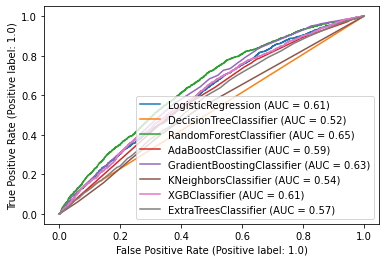

<Figure size 1800x1800 with 0 Axes>

In [172]:
#Lets plot roc curve and check auc and performance of all algorithms
plt.figure(figsize=(20,6))
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(LR, X_test, Y_test)
plot_roc_curve(dt, X_test, Y_test, ax = disp.ax_)
plot_roc_curve(RF, X_test, Y_test, ax = disp.ax_)
plot_roc_curve(ada, X_test, Y_test, ax = disp.ax_)
plot_roc_curve(gb, X_test, Y_test, ax = disp.ax_)
plot_roc_curve(kn, X_test, Y_test, ax = disp.ax_)
plot_roc_curve(xgb, X_test, Y_test, ax = disp.ax_)
plot_roc_curve(ext, X_test, Y_test, ax = disp.ax_)
plt.figure(figsize = (25,25))
plt.show()

In [156]:
## Hyperparameter tuning
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV

In [176]:
list1=['Logistic Regression','Decision Tree','Random Forest','Bagging','Adaboost','GradientBoosting','XGBoost','Naive-Bayes'
       ,'K-nearestNeighbor','Voting Classifier','ext_tree']

list2=[accuracy_lr,accuracy_dt,accuracy_RF,accuracy_bbg, accuracy_ad, accuracy_gb , accuracy_xgb , accuracy_nb ,
       accuracy_kn ,accuracy_vc,accuracy_ext]

list3=[0.56,0.90,0.93,0.76, 0.35,0.53,1.0,0.96,0.76 ,0.44,0.91]
       
final_accuracy=pd.DataFrame({'Algorithm':list1,'Accuracy':list2,'Recall for 0 class':list3})       

final_accuracy


,Algorithm,Accuracy,Recall for 0 class
0,Logistic Tegression,56.159065,0.56
1,Decision Tree,85.147416,0.90
2,Random Forest,87.297862,0.93
3,Bagging,40.171524,0.76
4,Adaboost,37.654137,0.35
5,GradientBoosting,54.200623,0.53
6,XGBoost,93.557196,1.00
7,Naive-Bayes,90.049921,0.96
8,K-nearestNeighbor,73.187695,0.76
9,Voting Classifier,45.261766,0.44


<AxesSubplot:xlabel='Algorithm', ylabel='Accuracy'>

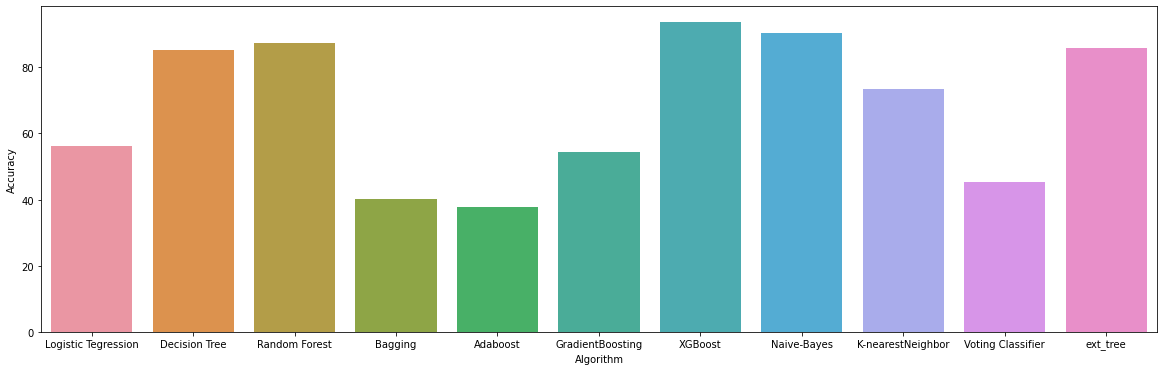

In [177]:
plt.figure(figsize=(20,6))
sns.barplot(x=final_accuracy['Algorithm'],y=final_accuracy['Accuracy'])


In [ ]:
### Here we can see Random  Forest ,Extra tree classifier ,Naives Bayes Classifier are giving high accuracy and recall value for 
## class 0 So ,these models are best for  prediction 

In [147]:
## Hyperparameter tuning
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV

In [179]:
#lets selects different parameters for tuning
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
grid_params = {
               'criterion':['gini','entropy'],
                'max_depth': [10,12,15,20,22],
                'n_estimators':[100,200,300,400],
                'max_features':['aoto','sqrt','log2'],
                'min_samples_split': [2]
                }

In [200]:
import time
cv_rf = RandomizedSearchCV(RF, cv = 10,
                     param_distributions=grid_params, 
                     n_jobs = 3)

cv_rf.fit(X_train, Y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)



Best Parameters using grid search: 
 {'n_estimators': 100, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 12, 'criterion': 'gini'}


In [207]:
cv_rf = RandomizedSearchCV(RF, cv = 10,
                     param_distributions=grid_params, 
                     n_jobs = 3)

cv_rf.fit(X_over, Y_over)
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'n_estimators': 400, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 22, 'criterion': 'gini'}


In [148]:
RF.set_params(n_estimators=100,
                  bootstrap = True,
                max_features='sqrt',
                  criterion= 'gini',
                 min_samples_split= 2,
                 max_depth= 12)



RandomForestClassifier(max_depth=12, max_features='sqrt')

In [149]:
RF.fit(X_over,Y_over)

RandomForestClassifier(max_depth=12, max_features='sqrt')

In [150]:
Y_pred_Hyper=RF.predict(X_test)

In [151]:


accuracy_RF_hyper = accuracy_score(Y_test,Y_pred_Hyper)*100

print(f"Accuracy Score:", accuracy_RF)
print(f"\nroc_auc_score: {roc_auc_score(Y_test,Y_pred_Hyper)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(Y_test,Y_pred_Hyper)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(Y_test,Y_pred_Hyper)}")

#Precision and Recall
print(f"Precision : \n {precision_score(Y_test,Y_pred_Hyper)}\n")
print(f"Recall : \n {recall_score(Y_test,Y_pred_Hyper)}")

#cross validation score
scores = cross_val_score(RF, X_over, Y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy_RF_hyper - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 87.25519477748858

roc_auc_score: 58.30158082110351
---------------------------------------------------
Confusion Matrix : 
 [[15570  6368]
 [  815   684]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       0.95      0.71      0.81     21938
         1.0       0.10      0.46      0.16      1499

    accuracy                           0.69     23437
   macro avg       0.52      0.58      0.49     23437
weighted avg       0.90      0.69      0.77     23437

Precision : 
 0.09699376063528077

Recall : 
 0.4563042028018679

Cross validation score : 79.68763012520661


Accuracy Score - Cross Validation Score : -10.335750618443797


In [ ]:
#Best Parameters using random search: 
# {'n_estimators': 400, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 22, 'criterion': 'gini'}

In [152]:
RF.set_params(n_estimators=400,
                  bootstrap = True,
                max_features='sqrt',
                  criterion= 'gini',
                 min_samples_split= 2,
                 max_depth= 22)

RandomForestClassifier(max_depth=22, max_features='sqrt', n_estimators=400)

In [153]:
RF.fit(X_over,Y_over)

RandomForestClassifier(max_depth=22, max_features='sqrt', n_estimators=400)

In [154]:
Y_pred_Hyper_2=RF.predict(X_test)

In [155]:


accuracy_RF_hyper_2 = accuracy_score(Y_test,Y_pred_Hyper_2)*100

print(f"Accuracy Score:", accuracy_RF)
print(f"\nroc_auc_score: {roc_auc_score(Y_test,Y_pred_Hyper_2)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(Y_test,Y_pred_Hyper_2)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(Y_test,Y_pred_Hyper_2)}")

#Precision and Recall
print(f"Precision : \n {precision_score(Y_test,Y_pred_Hyper_2)}\n")
print(f"Recall : \n {recall_score(Y_test,Y_pred_Hyper_2)}")

#cross validation score
scores = cross_val_score(RF, X_over, Y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy_RF_hyper_2 - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 87.25519477748858

roc_auc_score: 53.6876910860013
---------------------------------------------------
Confusion Matrix : 
 [[18463  3475]
 [ 1151   348]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       0.94      0.84      0.89     21938
         1.0       0.09      0.23      0.13      1499

    accuracy                           0.80     23437
   macro avg       0.52      0.54      0.51     23437
weighted avg       0.89      0.80      0.84     23437

Precision : 
 0.0910279884907141

Recall : 
 0.23215476984656438

Cross validation score : 88.99446472601787


Accuracy Score - Cross Validation Score : -8.73248580380087


In [212]:
#### Here we can observe that Recall Value for minority class is 0.84 So THis Random Forest Model With 
#### The hyperparamether is best